<a href="https://colab.research.google.com/github/ebi19912/AI/blob/main/check_Models_Layers_For_X_ray_Images_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ConvNeXtBase**

✅ Feature maps extracted from the following layers:
🔍 layer_0


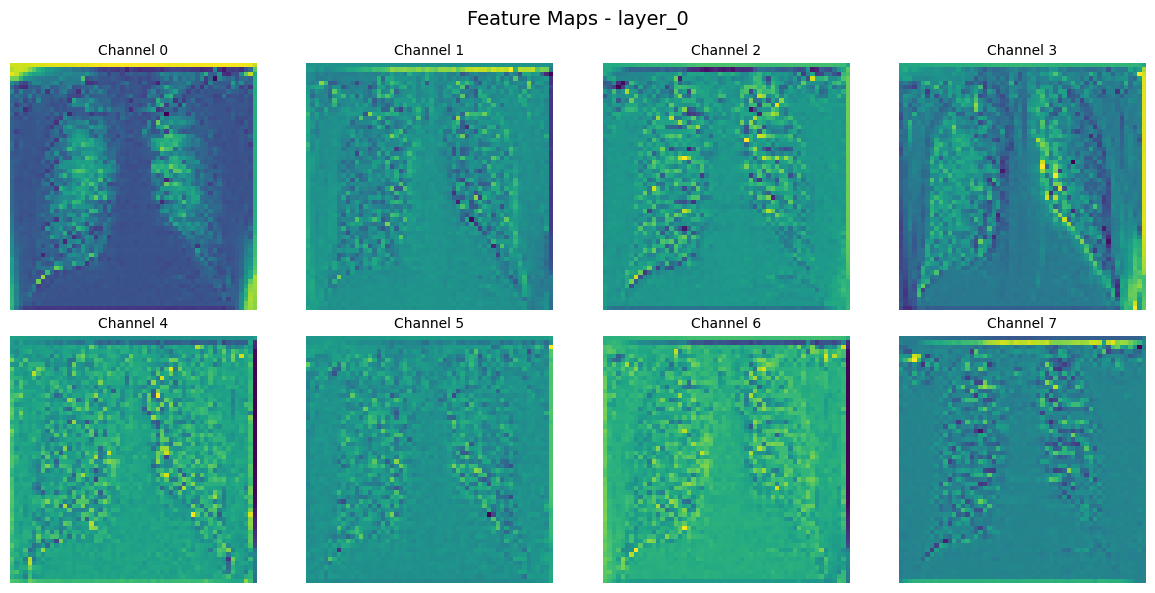

🔍 layer_1


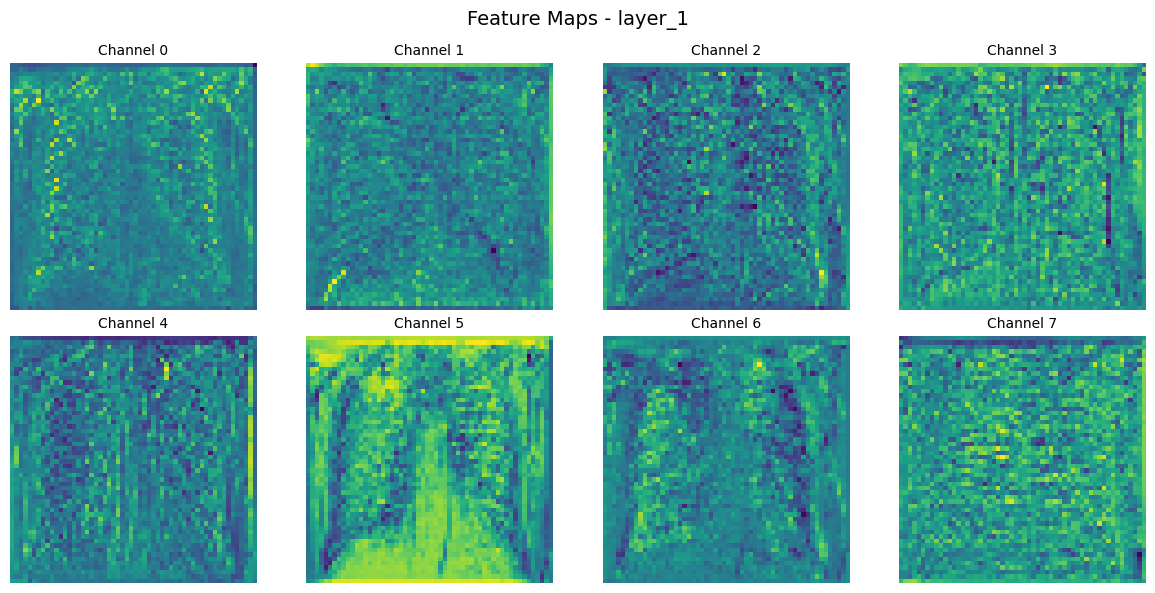

🔍 layer_2


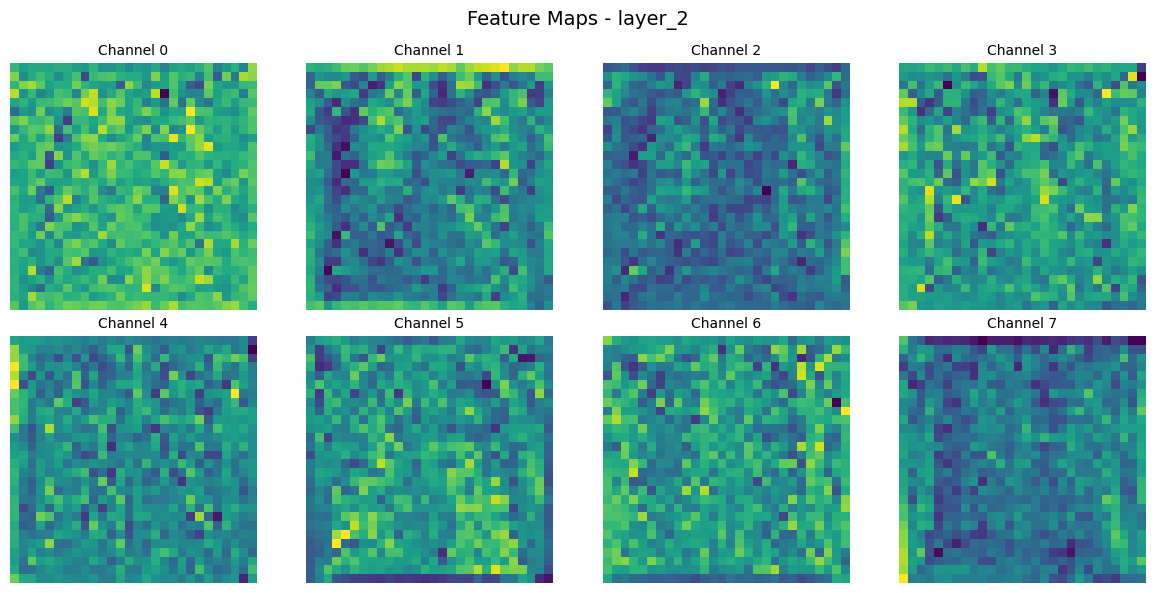

🔍 layer_3


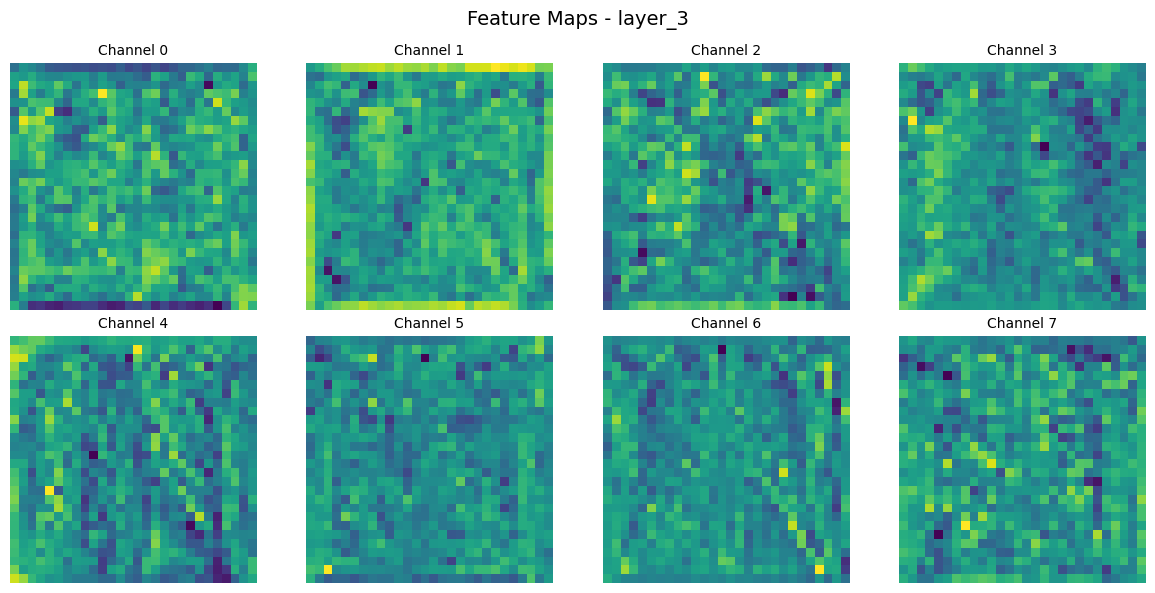

🔍 layer_4


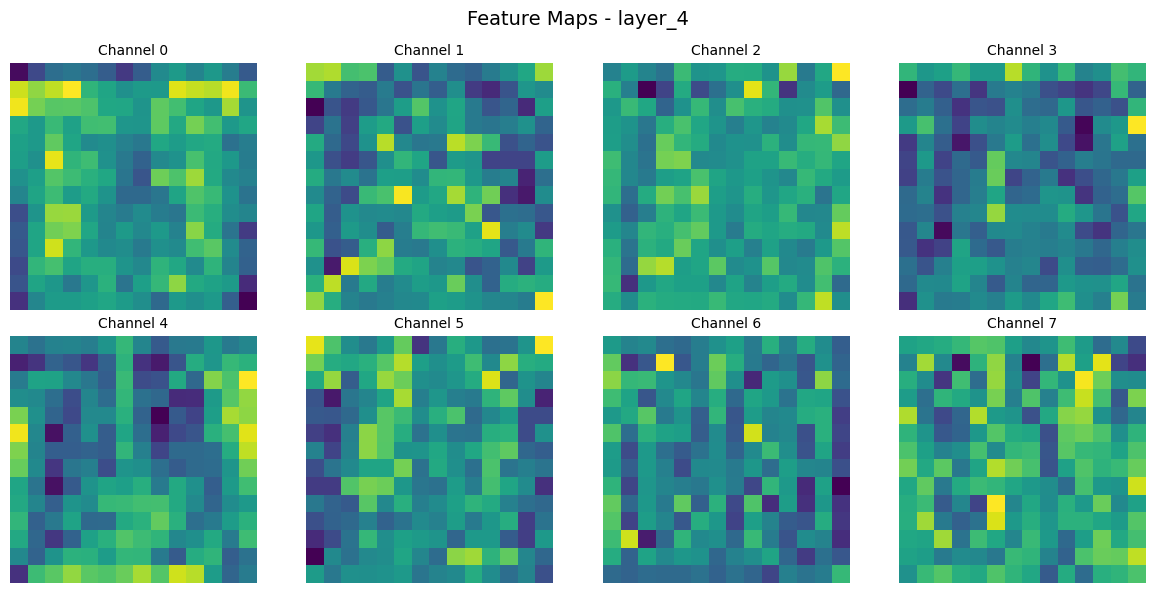

🔍 layer_5


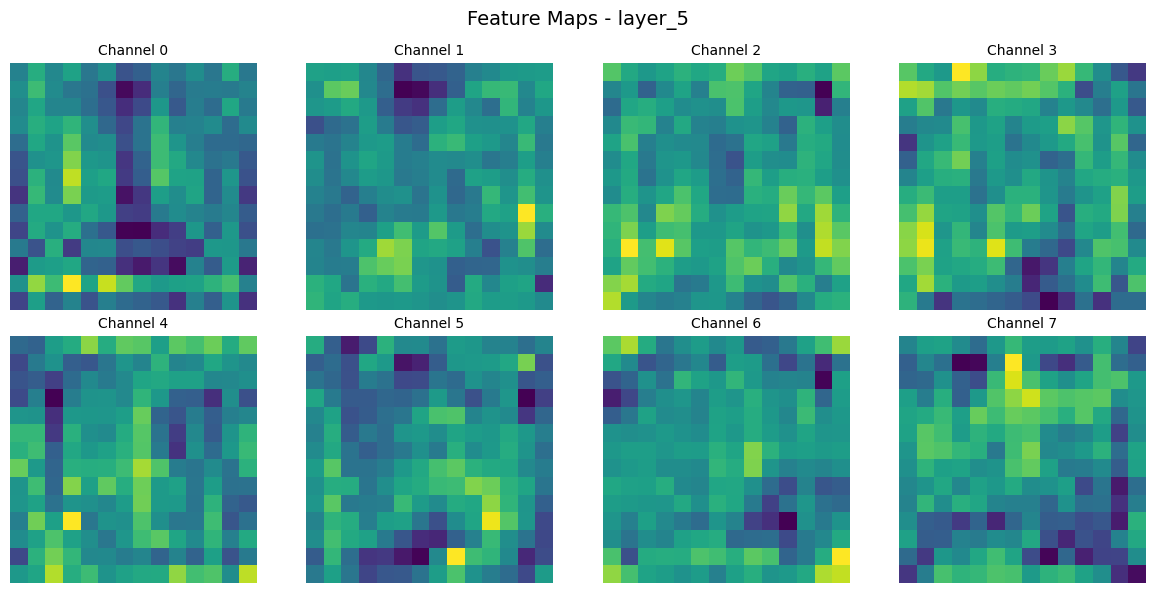

🔍 layer_6


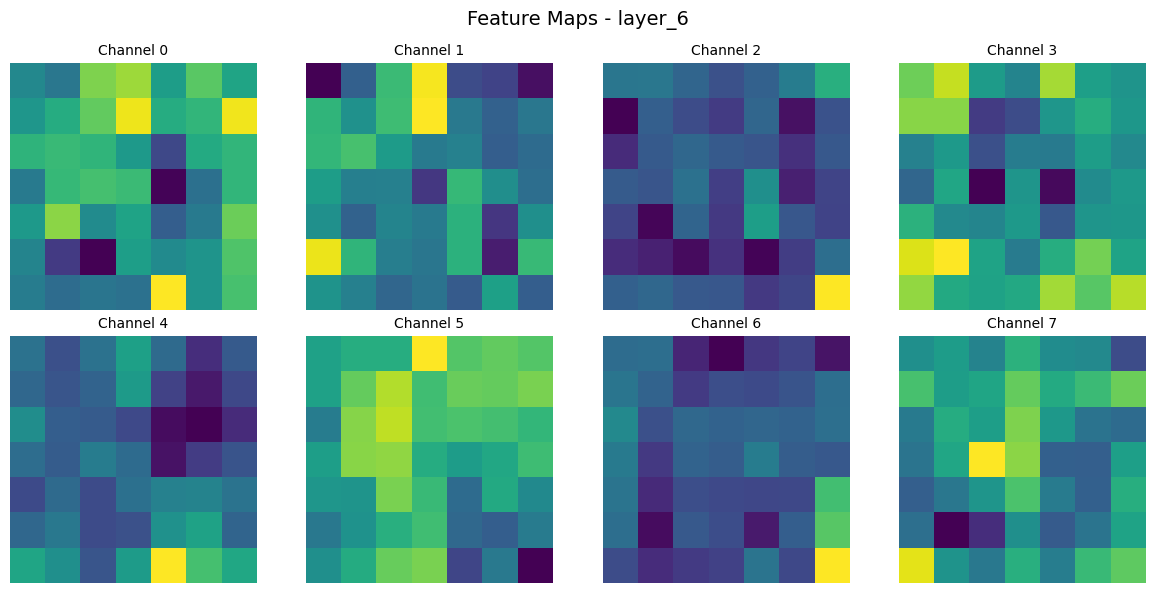

🔍 layer_7


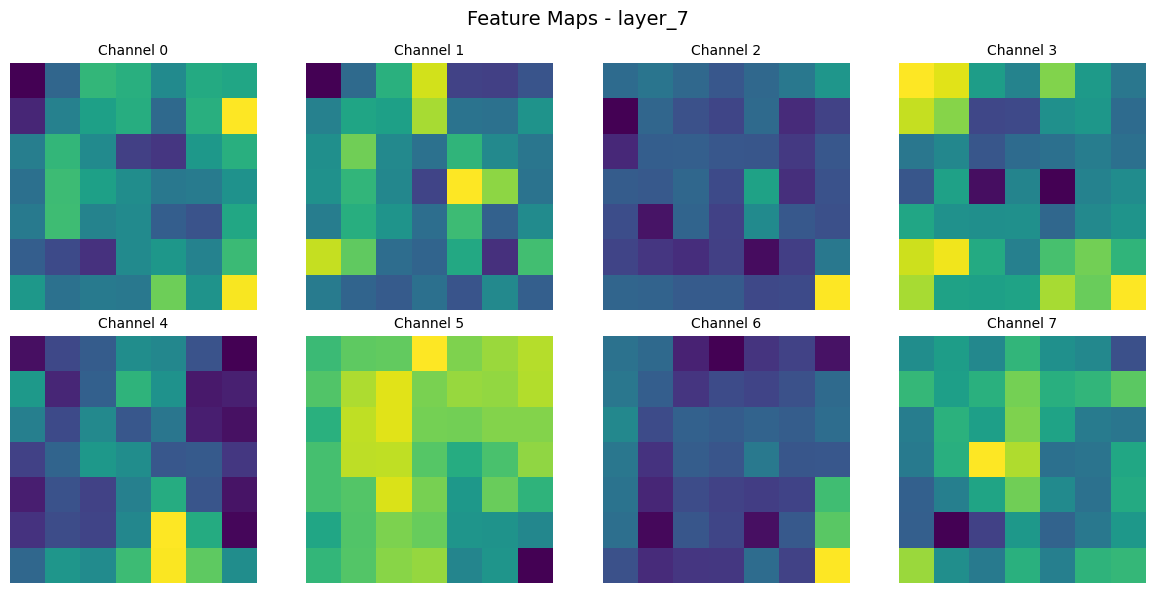

In [ ]:
# Import required libraries
import torch
import torchvision.models as models
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# 1. Load the pretrained ConvNeXtBase model
model = models.convnext_base(pretrained=True)
model.eval()

# 2. Load the input image (X-ray image in RGB)
image = Image.open('/content/1.png').convert('RGB')

# 3. Define preprocessing transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
input_tensor = transform(image).unsqueeze(0)  # Shape: [1, 3, 224, 224]

# 4. Register hooks to capture feature maps from each layer
feature_maps = {}

def get_hook(name):
    def hook(module, input, output):
        feature_maps[name] = output.detach()
    return hook

for name, layer in model.features.named_children():
    layer.register_forward_hook(get_hook(f'layer_{name}'))

# 5. Forward pass
with torch.no_grad():
    _ = model(input_tensor)

# 6. Create output directory
output_dir = 'feature_maps_output'
os.makedirs(output_dir, exist_ok=True)

# 7. Function to visualize and save feature maps
def save_feature_maps(layer_name, num_channels=8):
    fmap = feature_maps[layer_name][0]
    num_channels = min(num_channels, fmap.shape[0])
    cols = 4
    rows = int(np.ceil(num_channels / cols))

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
    axes = axes.flatten()

    for i in range(num_channels):
        axes[i].imshow(fmap[i].cpu().numpy(), cmap='viridis')
        axes[i].axis('off')
        axes[i].set_title(f'Channel {i}', fontsize=10)

    for j in range(num_channels, len(axes)):
        axes[j].axis('off')

    plt.suptitle(f'Feature Maps - {layer_name}', fontsize=14)
    plt.tight_layout()
    plt.savefig(f"{output_dir}/{layer_name}.png")
    plt.show()

# 8. Save feature maps from all captured layers
print("✅ Feature maps extracted from the following layers:")
for layer_name in feature_maps.keys():
    print(f"🔍 {layer_name}")
    save_feature_maps(layer_name, num_channels=8)


In [ ]:
# Import required libraries
import torch
import torchvision.models as models
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# 1. Load the pretrained vgg19 model
model = models.vgg19(pretrained=True).eval()

# 2. Load the input image (X-ray image in RGB)
image = Image.open('/content/1.png').convert('RGB')

# 3. Define preprocessing transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
input_tensor = transform(image).unsqueeze(0)  # Shape: [1, 3, 224, 224]

# 4. Register hooks to capture feature maps from each layer
feature_maps = {}

def get_hook(name):
    def hook(module, input, output):
        feature_maps[name] = output.detach()
    return hook


for idx, layer in enumerate(model.features):
    layer.register_forward_hook(get_hook(f'layer_{idx}'))

# 5. Forward pass
with torch.no_grad():
    _ = model(input_tensor)

# 6. Create output directory
output_dir = 'feature_maps_output'
os.makedirs(output_dir, exist_ok=True)

# 7. Function to visualize and save feature maps
def save_feature_maps(layer_name, num_channels=8):
    fmap = feature_maps[layer_name][0]
    num_channels = min(num_channels, fmap.shape[0])
    cols = 4
    rows = int(np.ceil(num_channels / cols))

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
    axes = axes.flatten()

    for i in range(num_channels):
        axes[i].imshow(fmap[i].cpu().numpy(), cmap='viridis')
        axes[i].axis('off')
        axes[i].set_title(f'Channel {i}', fontsize=10)

    for j in range(num_channels, len(axes)):
        axes[j].axis('off')

    plt.suptitle(f'Feature Maps - {layer_name}', fontsize=14)
    plt.tight_layout()
    plt.savefig(f"{output_dir}/{layer_name}.png")
    plt.show()

# 8. Save feature maps from all captured layers
print("✅ Feature maps extracted from the following layers:")
for layer_name in feature_maps.keys():
    print(f"🔍 {layer_name}")
    save_feature_maps(layer_name, num_channels=8)


In [ ]:
# Import required libraries
import torch
import torchvision.models as models
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# 1. Load the pretrained VGG16 model
model = models.vgg16(pretrained=True).eval()

# 2. Load the input image (X-ray image in RGB)
image = Image.open('/content/1.png').convert('RGB')

# 3. Define preprocessing transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
input_tensor = transform(image).unsqueeze(0)  # Shape: [1, 3, 224, 224]

# 4. Register hooks to capture feature maps from each layer
feature_maps = {}

def get_hook(name):
    def hook(module, input, output):
        feature_maps[name] = output.detach()
    return hook


for idx, layer in enumerate(model.features):
    layer.register_forward_hook(get_hook(f'layer_{idx}'))

# 5. Forward pass
with torch.no_grad():
    _ = model(input_tensor)

# 6. Create output directory
output_dir = 'feature_maps_output'
os.makedirs(output_dir, exist_ok=True)

# 7. Function to visualize and save feature maps
def save_feature_maps(layer_name, num_channels=8):
    fmap = feature_maps[layer_name][0]
    num_channels = min(num_channels, fmap.shape[0])
    cols = 4
    rows = int(np.ceil(num_channels / cols))

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
    axes = axes.flatten()

    for i in range(num_channels):
        axes[i].imshow(fmap[i].cpu().numpy(), cmap='viridis')
        axes[i].axis('off')
        axes[i].set_title(f'Channel {i}', fontsize=10)

    for j in range(num_channels, len(axes)):
        axes[j].axis('off')

    plt.suptitle(f'Feature Maps - {layer_name}', fontsize=14)
    plt.tight_layout()
    plt.savefig(f"{output_dir}/{layer_name}.png")
    plt.show()

# 8. Save feature maps from all captured layers
print("✅ Feature maps extracted from the following layers:")
for layer_name in feature_maps.keys():
    print(f"🔍 {layer_name}")
    save_feature_maps(layer_name, num_channels=8)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ConvNeXt_Tiny_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNeXt_Tiny_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/convnext_tiny-983f1562.pth" to /root/.cache/torch/hub/checkpoints/convnext_tiny-983f1562.pth
100%|██████████| 109M/109M [00:00<00:00, 145MB/s] 


✅ Feature maps extracted from the following layers:
🔍 layer_0


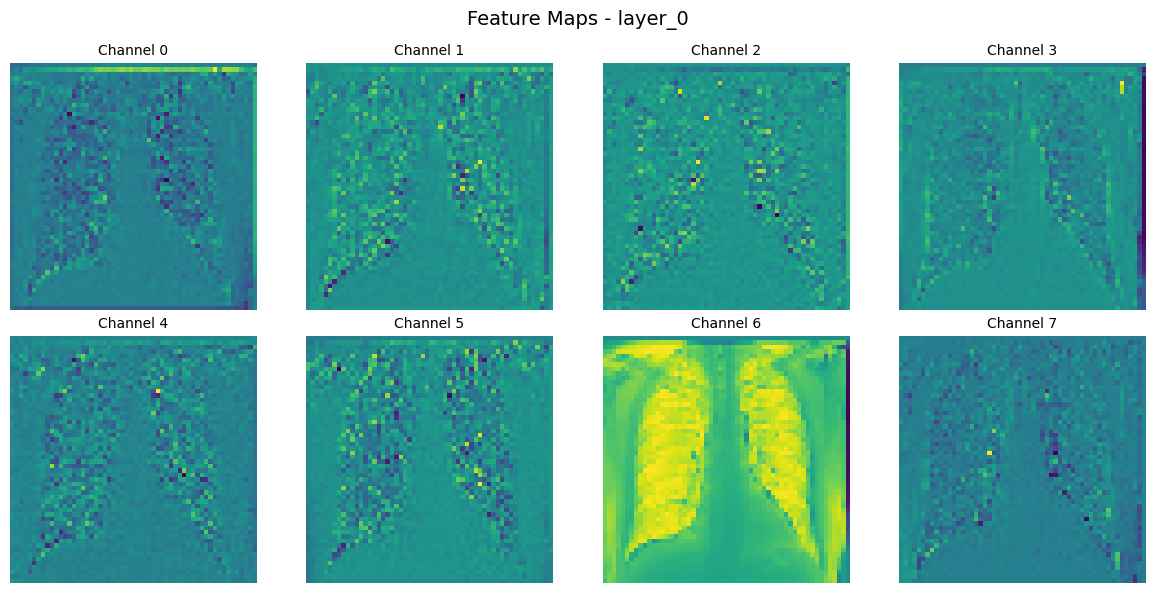

🔍 layer_1


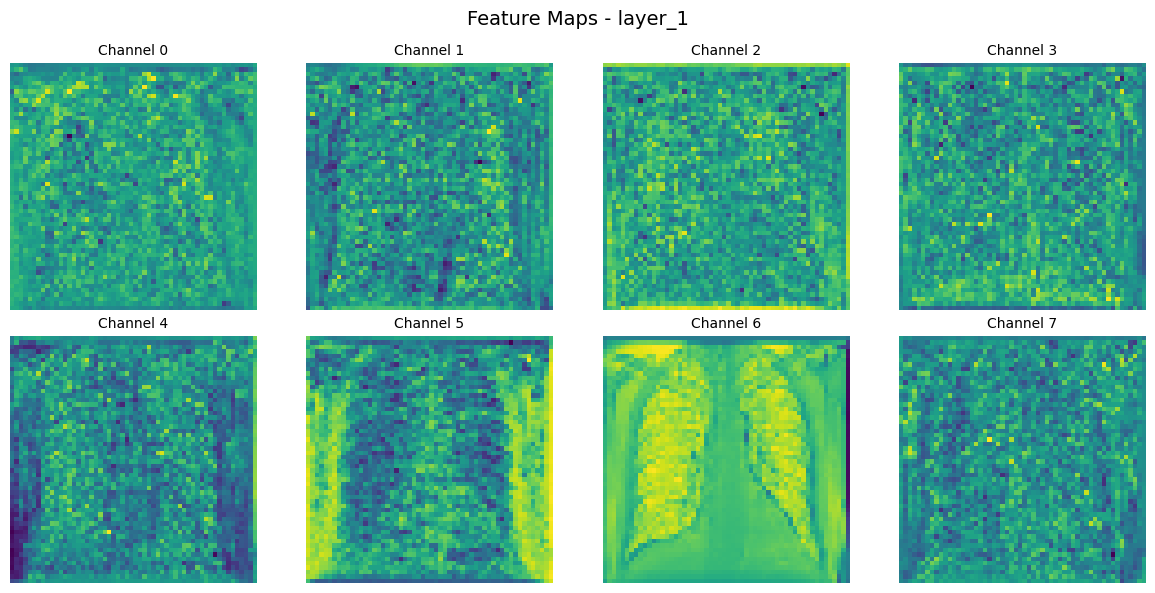

🔍 layer_2


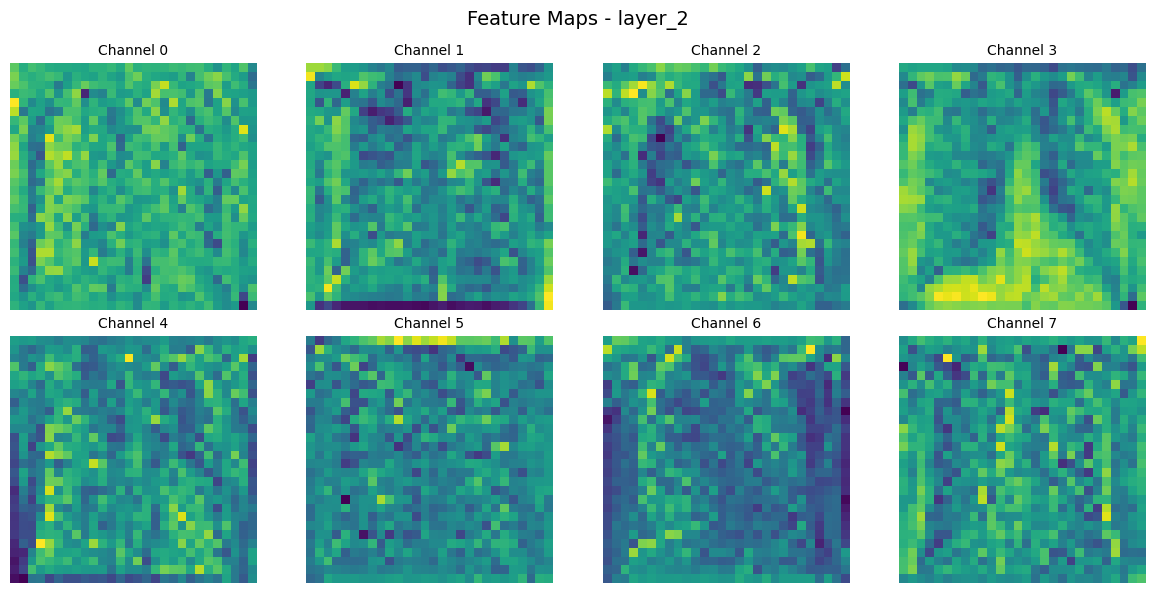

🔍 layer_3


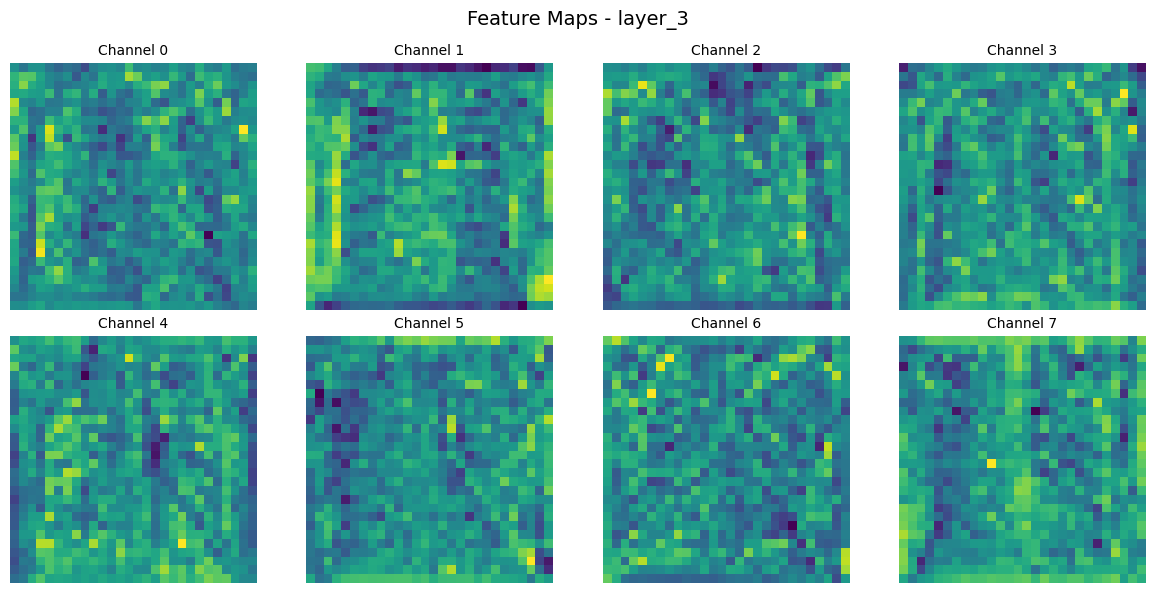

🔍 layer_4


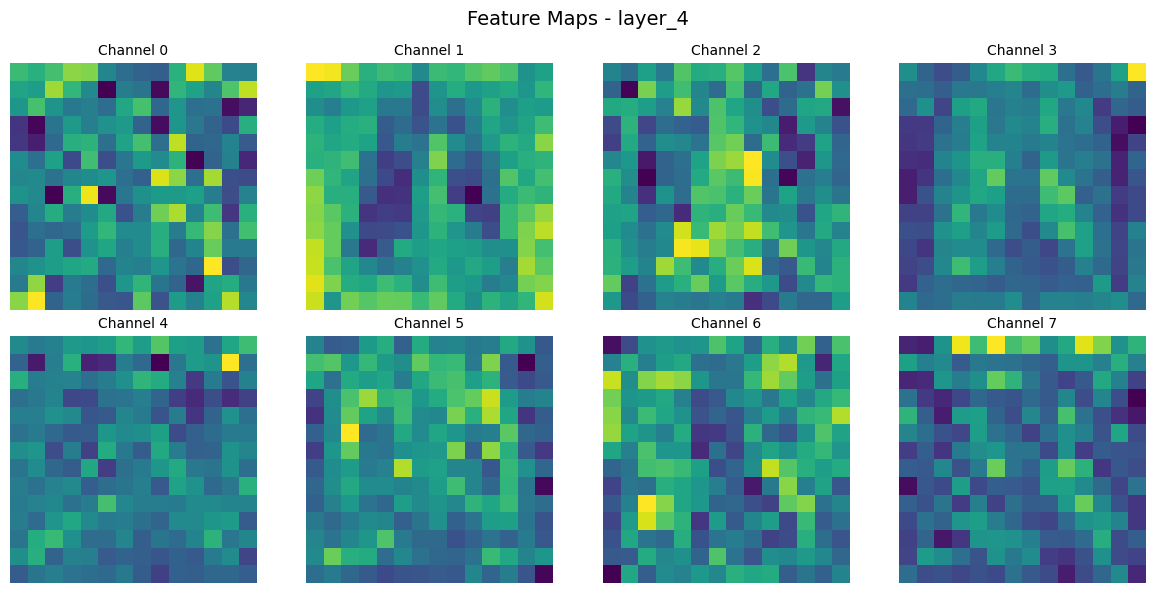

🔍 layer_5


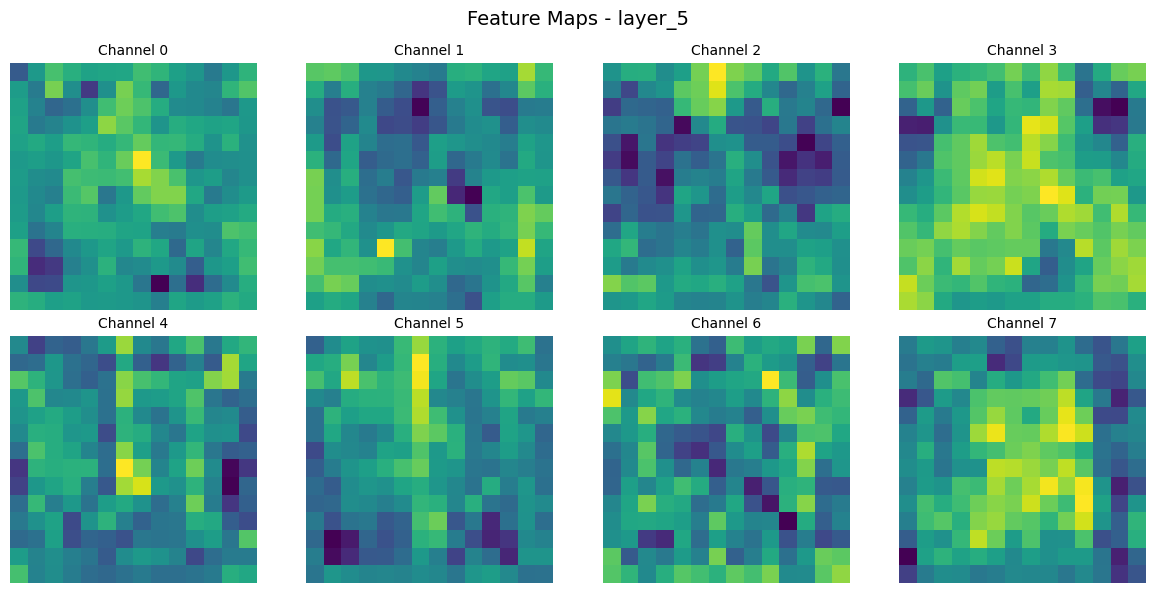

🔍 layer_6


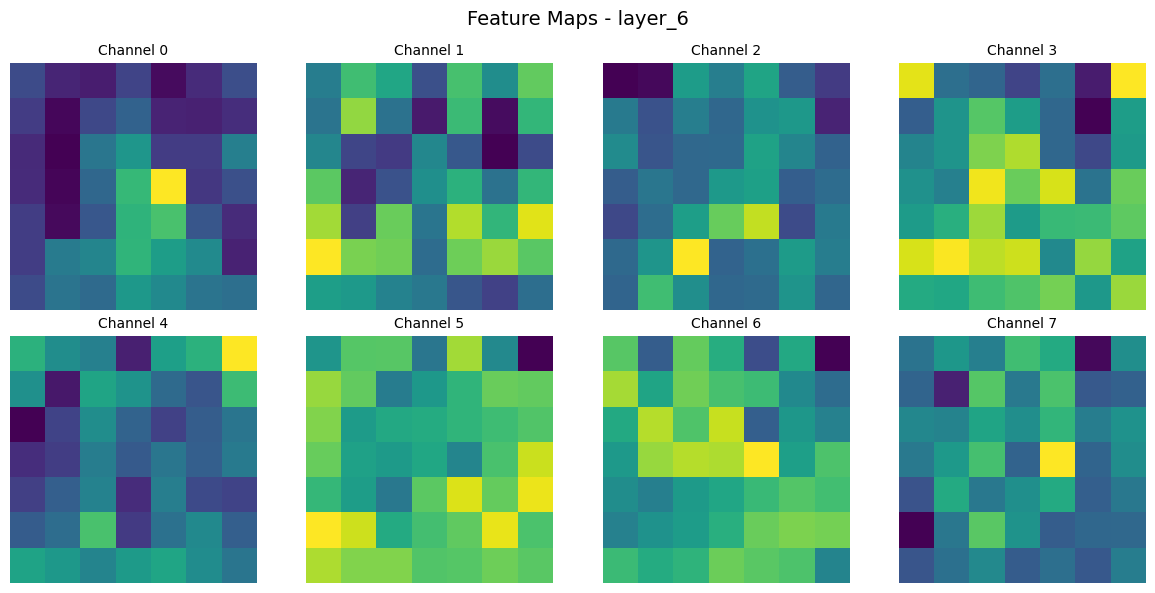

🔍 layer_7


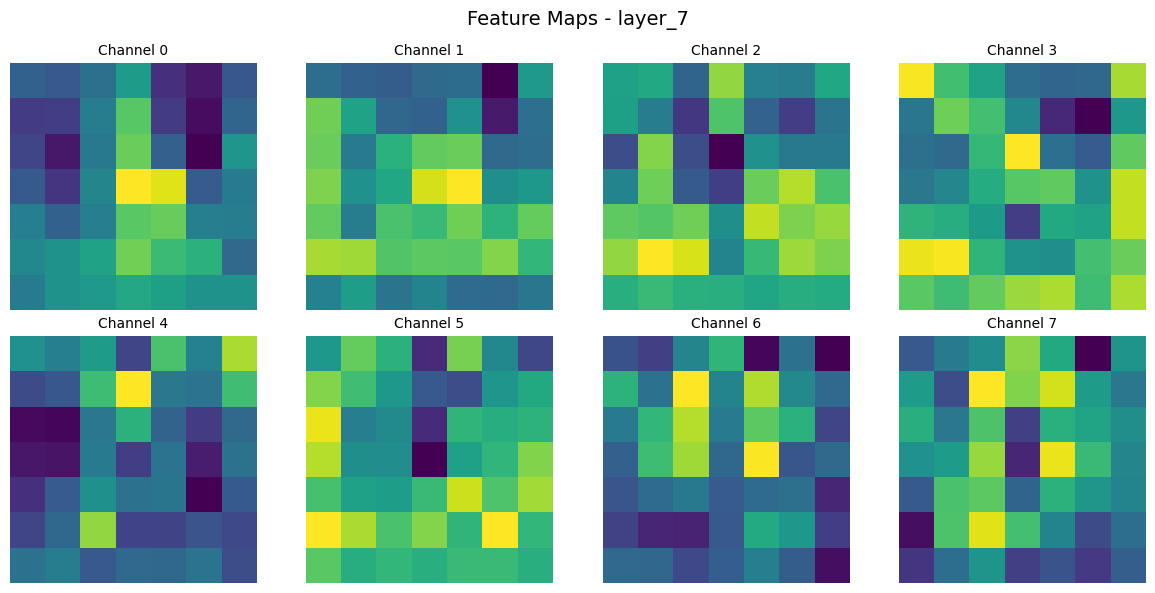

In [ ]:
# Import required libraries
import torch
import torchvision.models as models
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# 1. Load the pretrained ConvNeXtTiny model
model = models.convnext_tiny(pretrained=True).eval()

# 2. Load the input image (X-ray image in RGB)
image = Image.open('/content/1.png').convert('RGB')

# 3. Define preprocessing transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
input_tensor = transform(image).unsqueeze(0)  # Shape: [1, 3, 224, 224]

# 4. Register hooks to capture feature maps from each layer
feature_maps = {}

def get_hook(name):
    def hook(module, input, output):
        feature_maps[name] = output.detach()
    return hook


for idx, layer in enumerate(model.features):
    layer.register_forward_hook(get_hook(f'layer_{idx}'))

# 5. Forward pass
with torch.no_grad():
    _ = model(input_tensor)

# 6. Create output directory
output_dir = 'feature_maps_output'
os.makedirs(output_dir, exist_ok=True)

# 7. Function to visualize and save feature maps
def save_feature_maps(layer_name, num_channels=8):
    fmap = feature_maps[layer_name][0]
    num_channels = min(num_channels, fmap.shape[0])
    cols = 4
    rows = int(np.ceil(num_channels / cols))

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
    axes = axes.flatten()

    for i in range(num_channels):
        axes[i].imshow(fmap[i].cpu().numpy(), cmap='viridis')
        axes[i].axis('off')
        axes[i].set_title(f'Channel {i}', fontsize=10)

    for j in range(num_channels, len(axes)):
        axes[j].axis('off')

    plt.suptitle(f'Feature Maps - {layer_name}', fontsize=14)
    plt.tight_layout()
    plt.savefig(f"{output_dir}/{layer_name}.png")
    plt.show()

# 8. Save feature maps from all captured layers
print("✅ Feature maps extracted from the following layers:")
for layer_name in feature_maps.keys():
    print(f"🔍 {layer_name}")
    save_feature_maps(layer_name, num_channels=8)


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


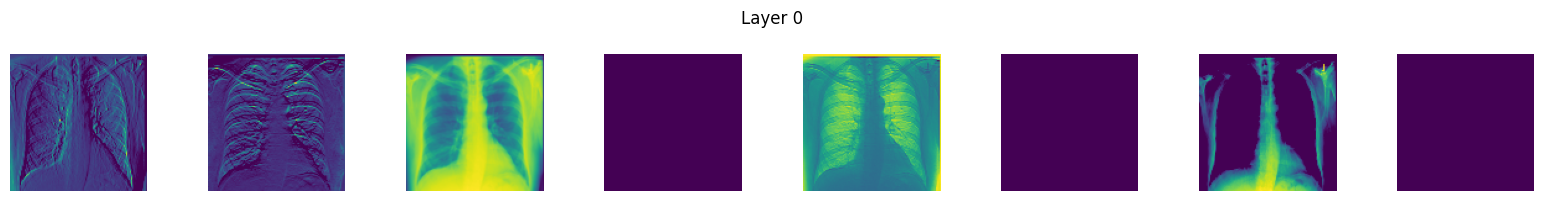

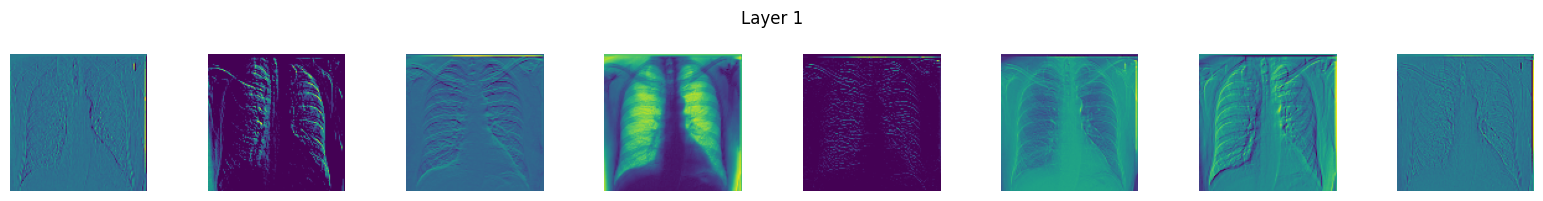

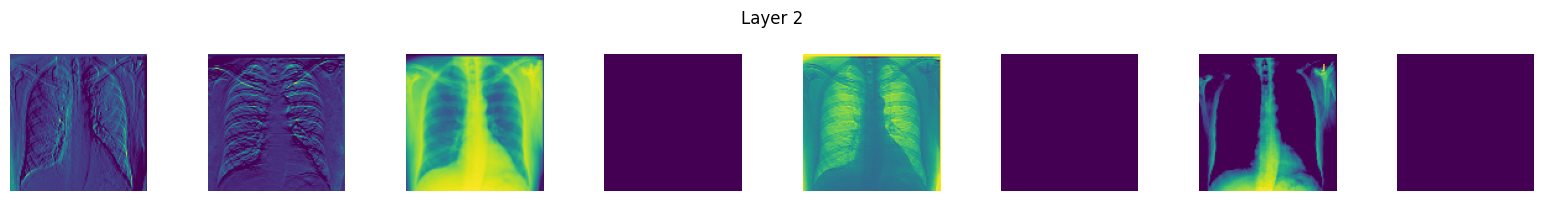

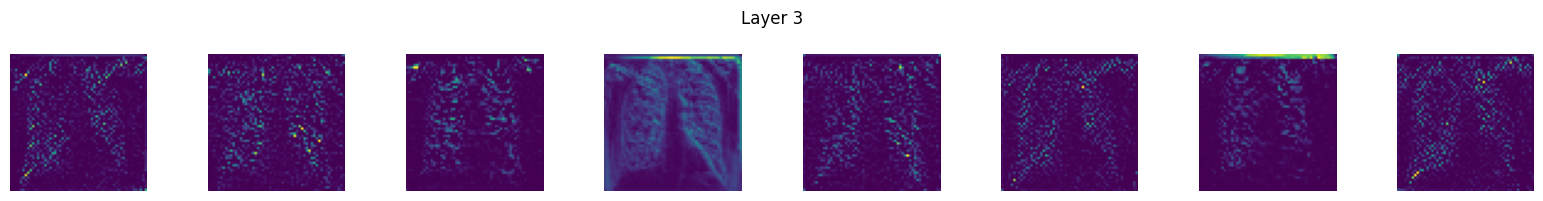

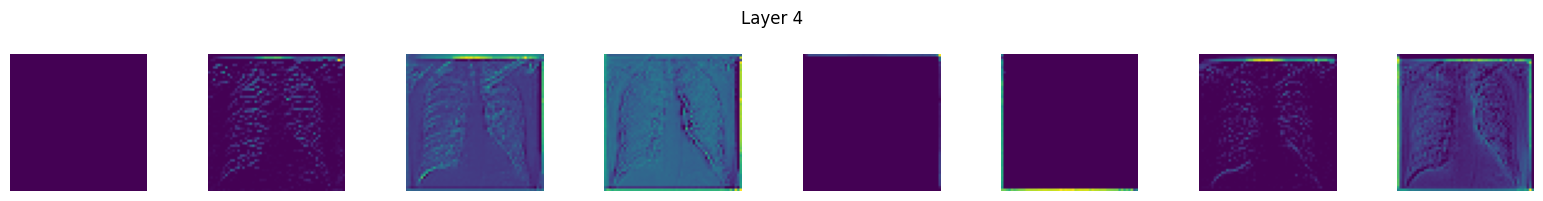

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.applications.nasnet import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# Load model
model = NASNetMobile(weights='imagenet', include_top=False)  # Without classification head

# Load and preprocess image
img_path = '/content/1.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Get feature maps
layer_outputs = [layer.output for layer in model.layers if 'activation' in layer.name]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(x)

# Create output dir
output_dir = 'nasnet_feature_maps'
os.makedirs(output_dir, exist_ok=True)

# Visualize feature maps
for idx, activation in enumerate(activations[:5]):  # Show first 5 layers for example
    channels = min(activation.shape[-1], 8)
    fig, axes = plt.subplots(1, channels, figsize=(channels * 2, 2))
    for i in range(channels):
        ax = axes[i]
        ax.imshow(activation[0, :, :, i], cmap='viridis')
        ax.axis('off')
    plt.suptitle(f'Layer {idx}')
    plt.tight_layout()
    plt.savefig(f'{output_dir}/layer_{idx}.png')
    plt.show()


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 99.1MB/s]


✅ Extracted feature maps from layers:
🔍 layer_0


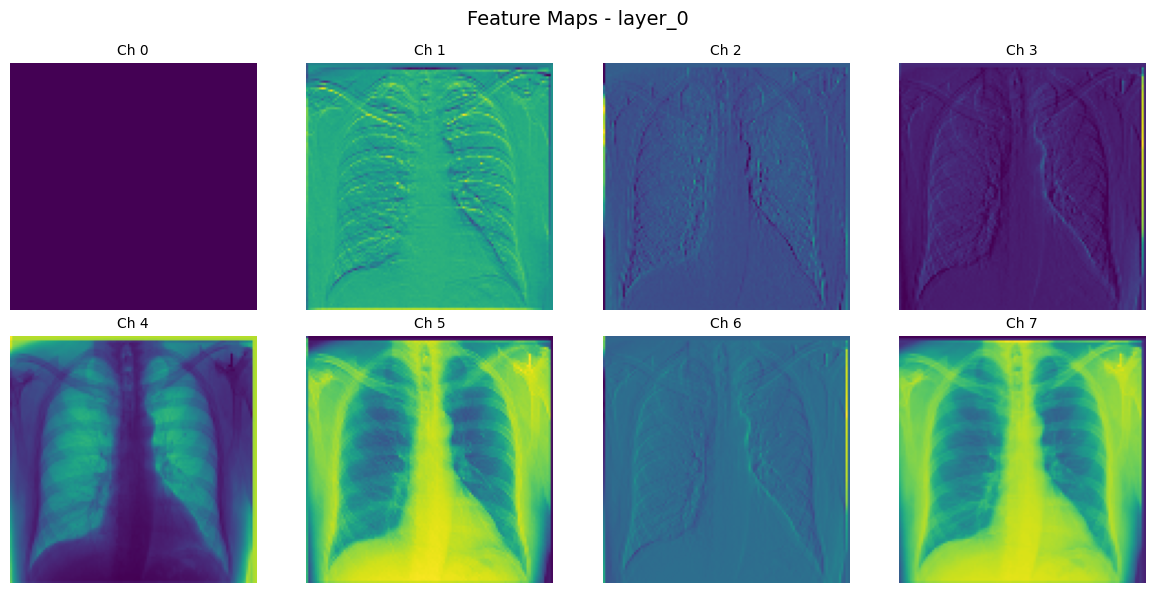

🔍 layer_1


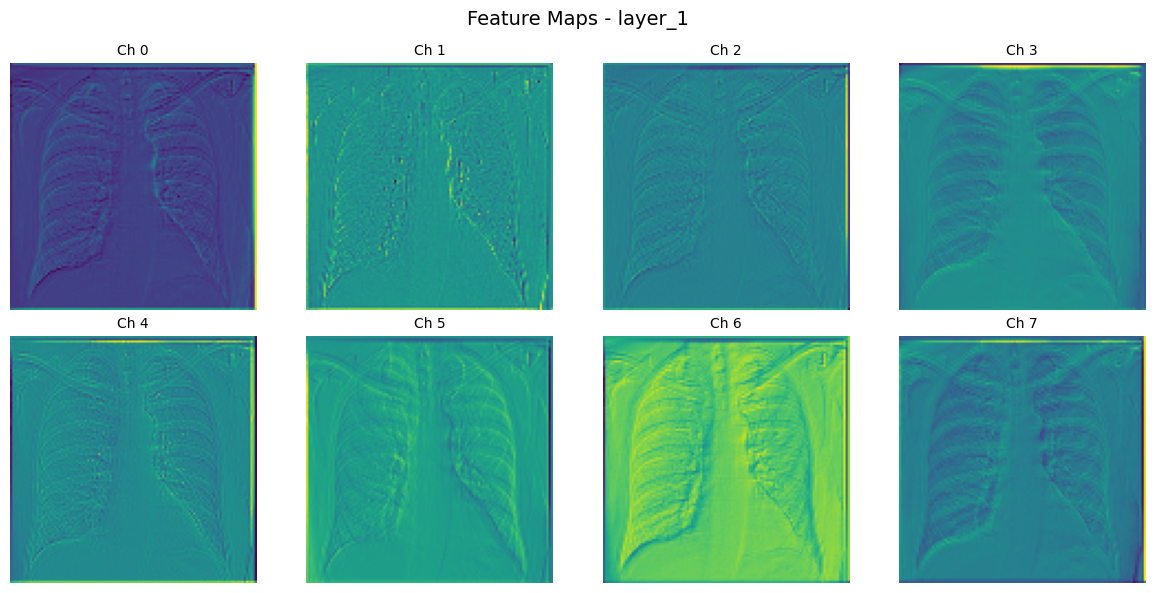

🔍 layer_2


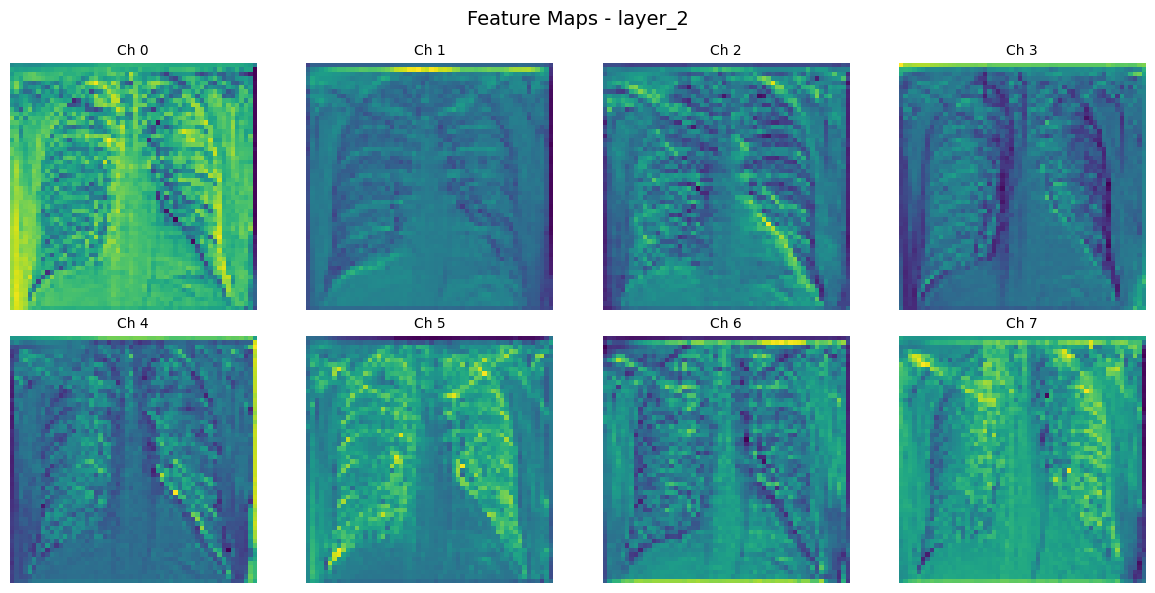

🔍 layer_3


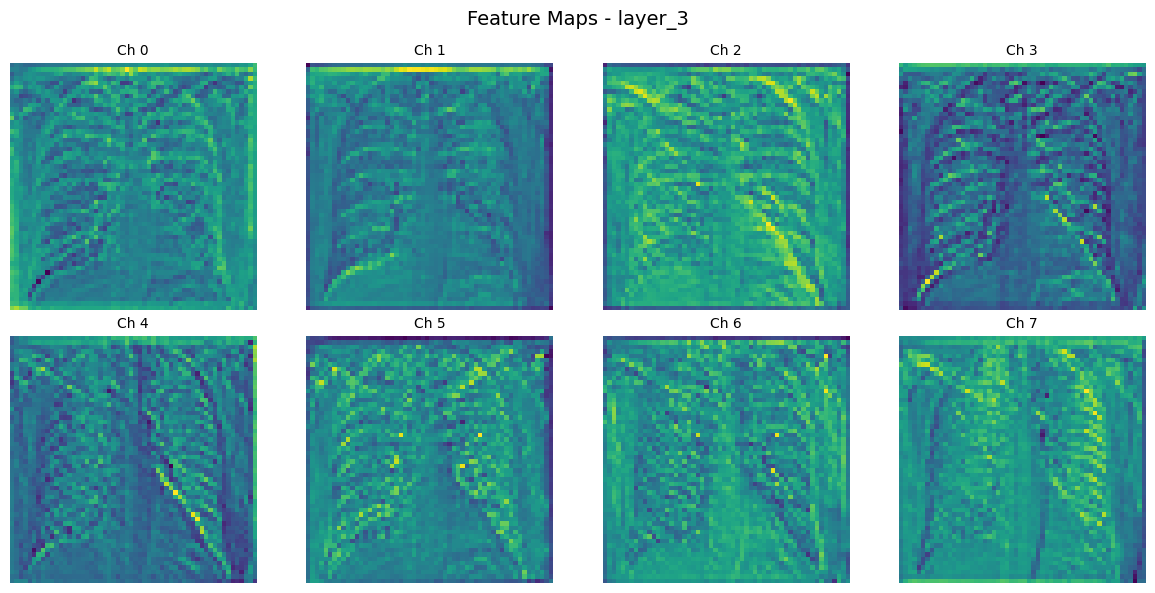

🔍 layer_4


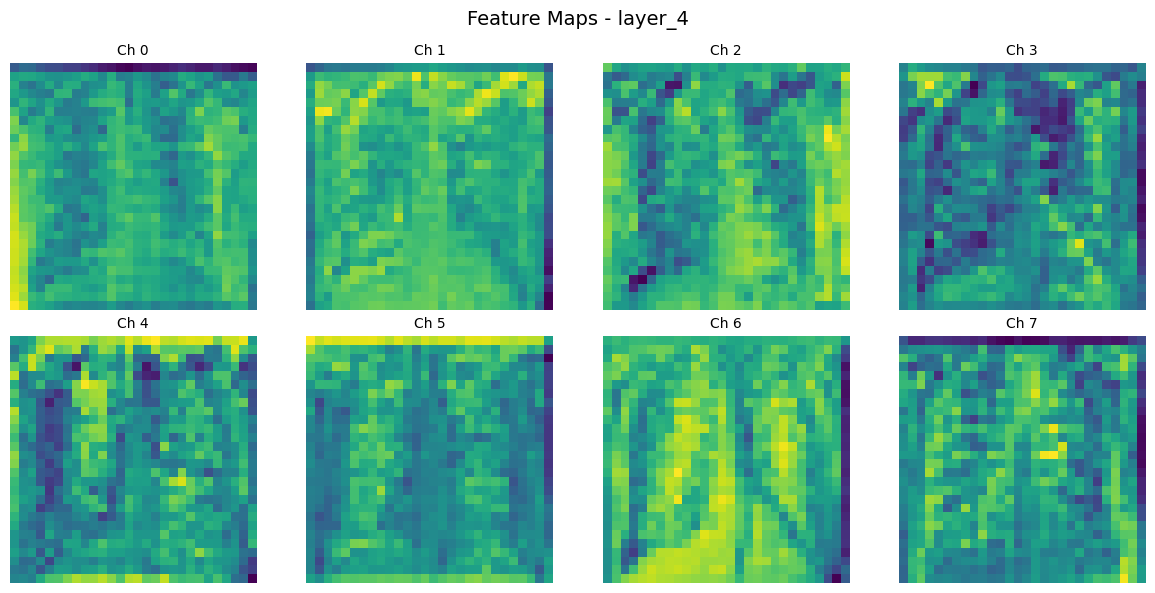

🔍 layer_5


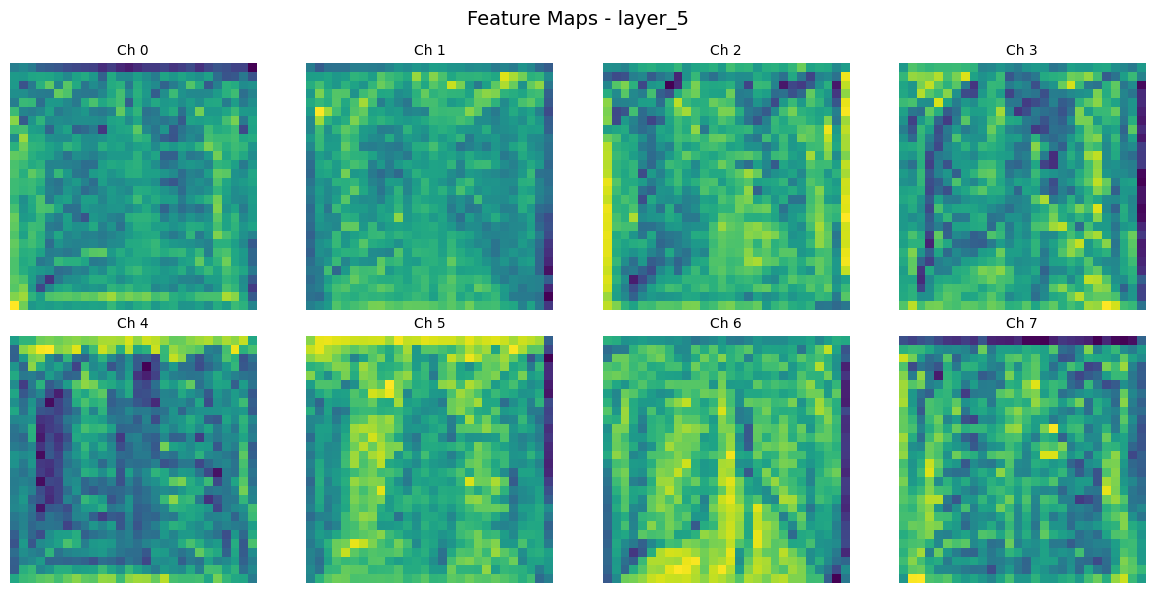

🔍 layer_6


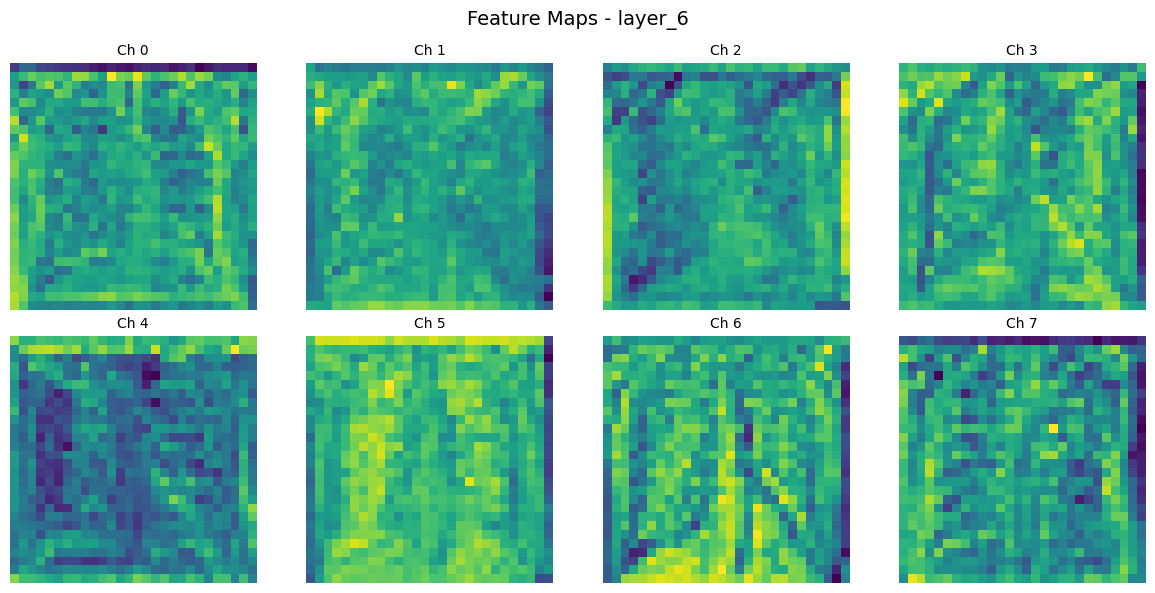

🔍 layer_7


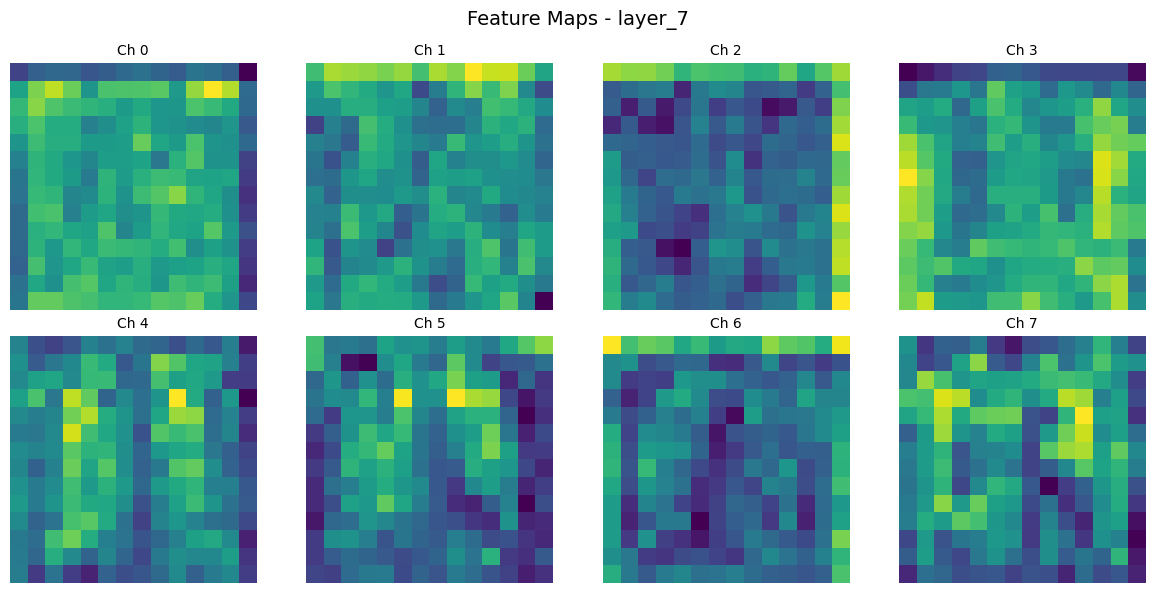

🔍 layer_8


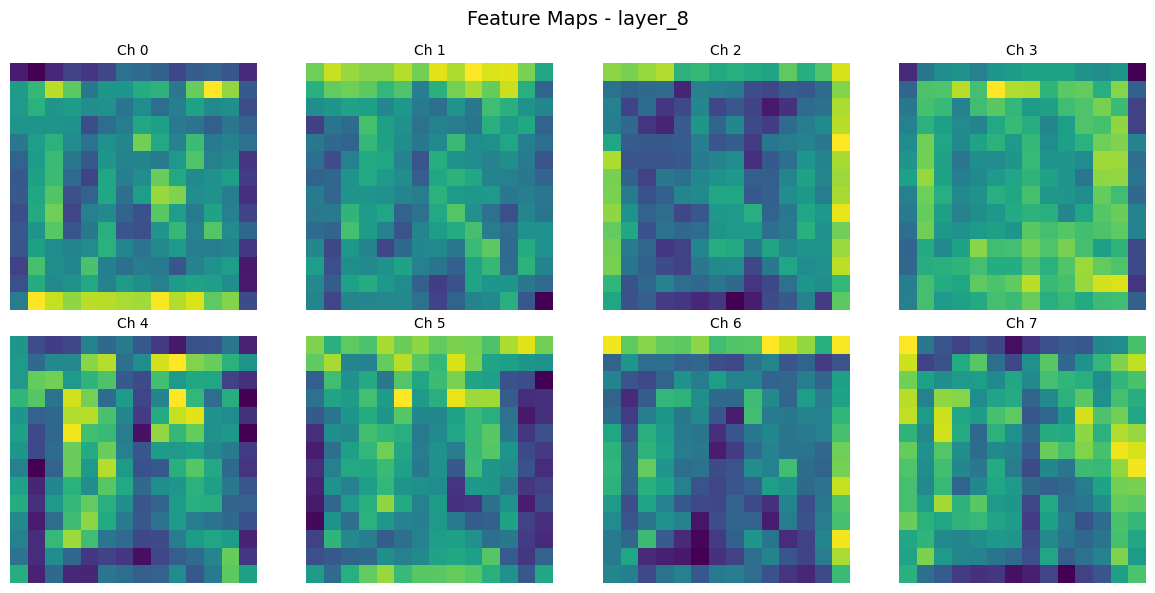

🔍 layer_9


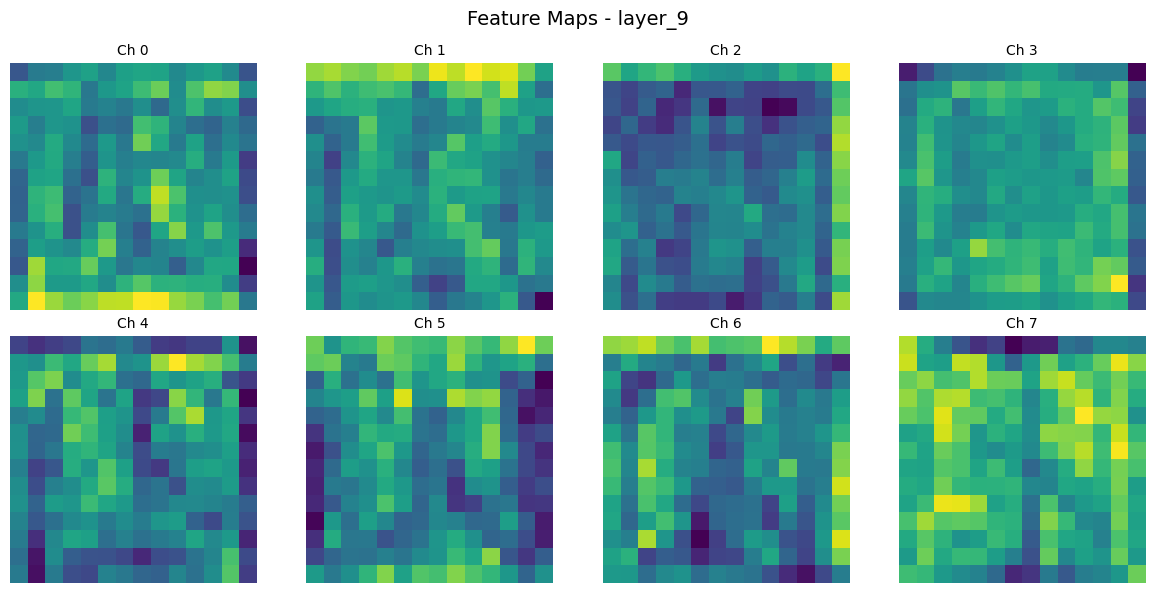

🔍 layer_10


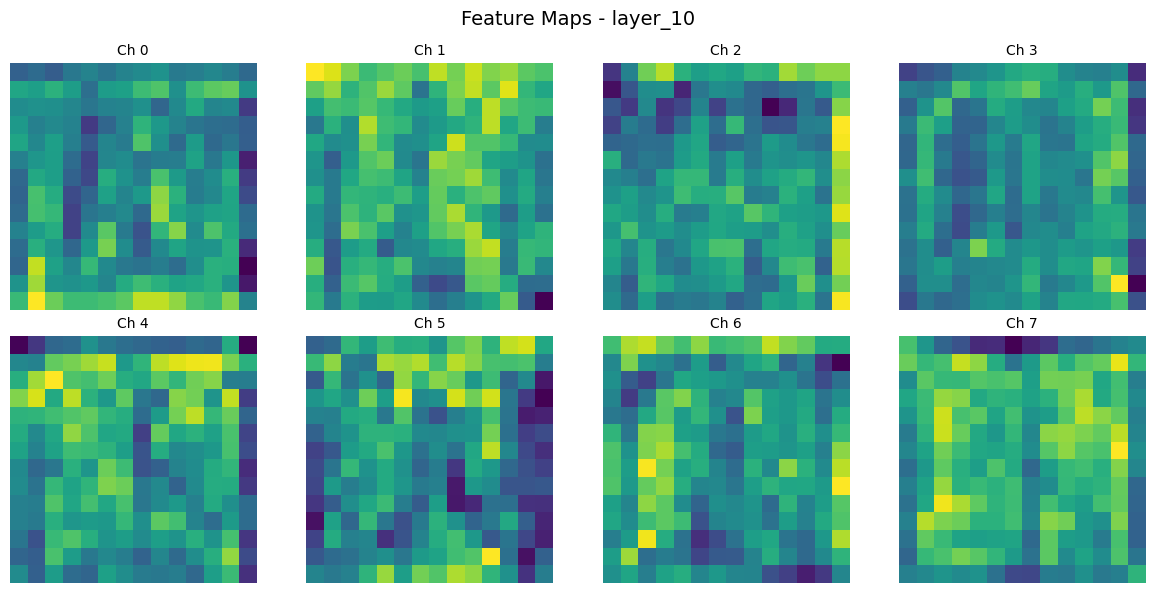

🔍 layer_11


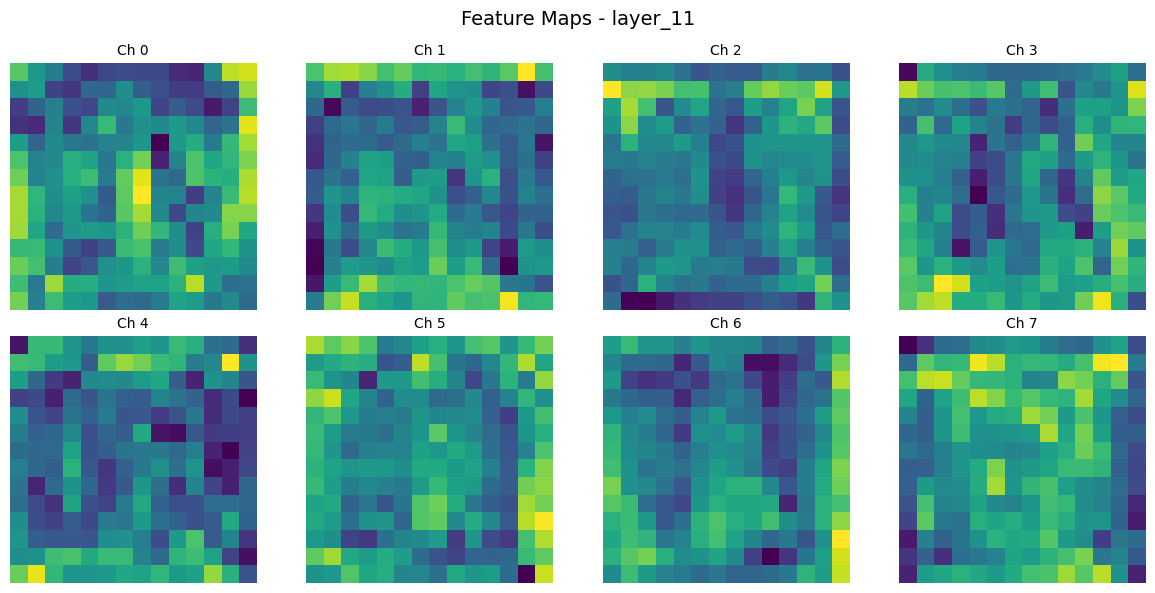

🔍 layer_12


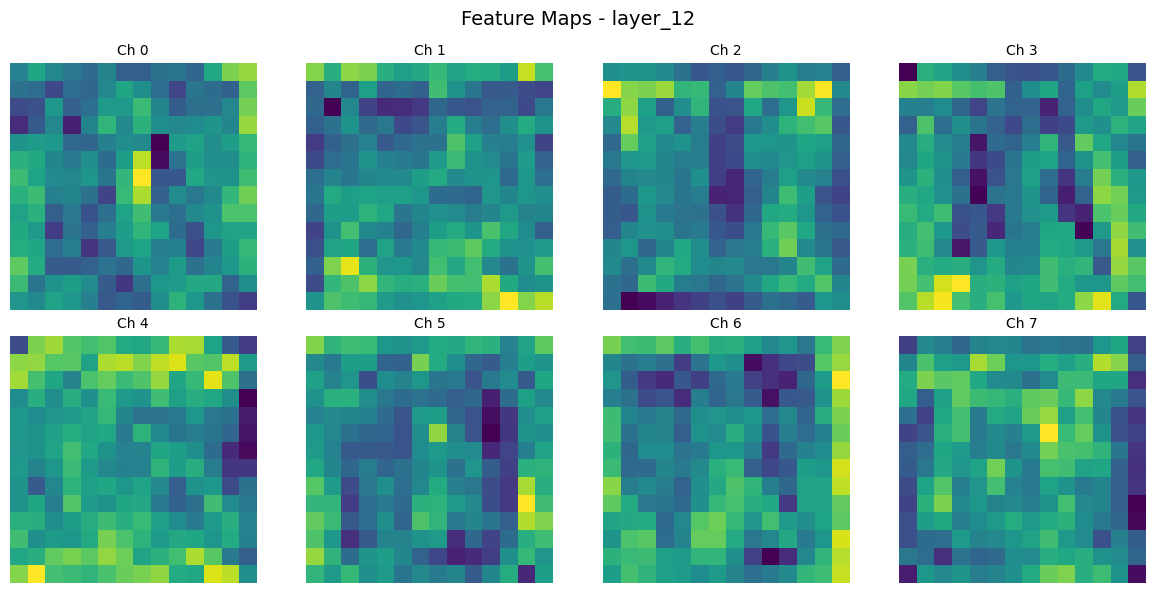

🔍 layer_13


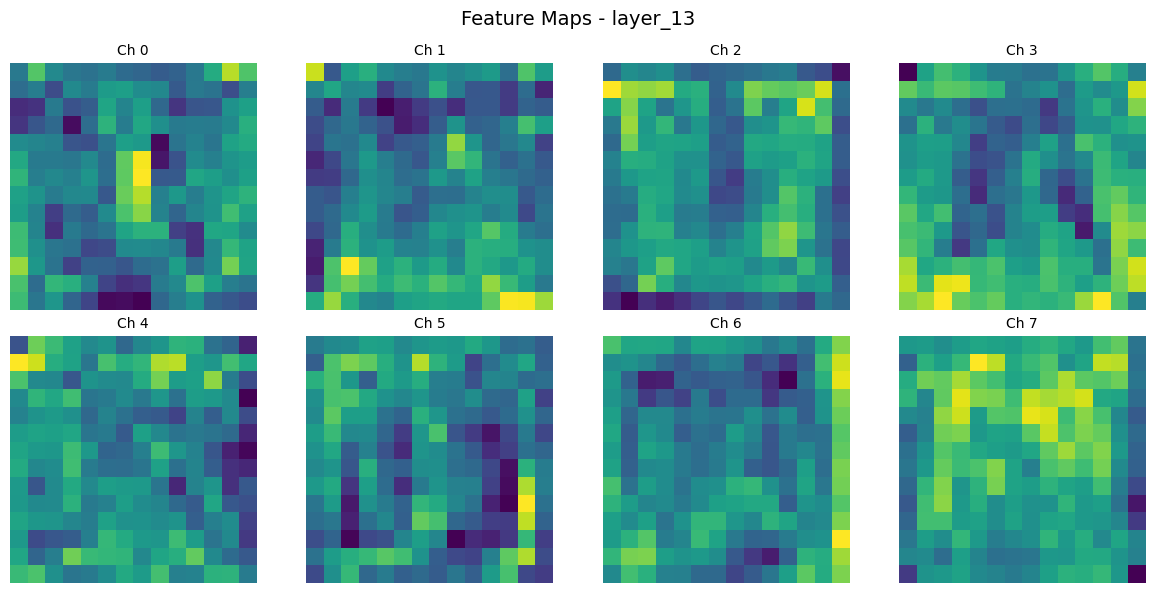

🔍 layer_14


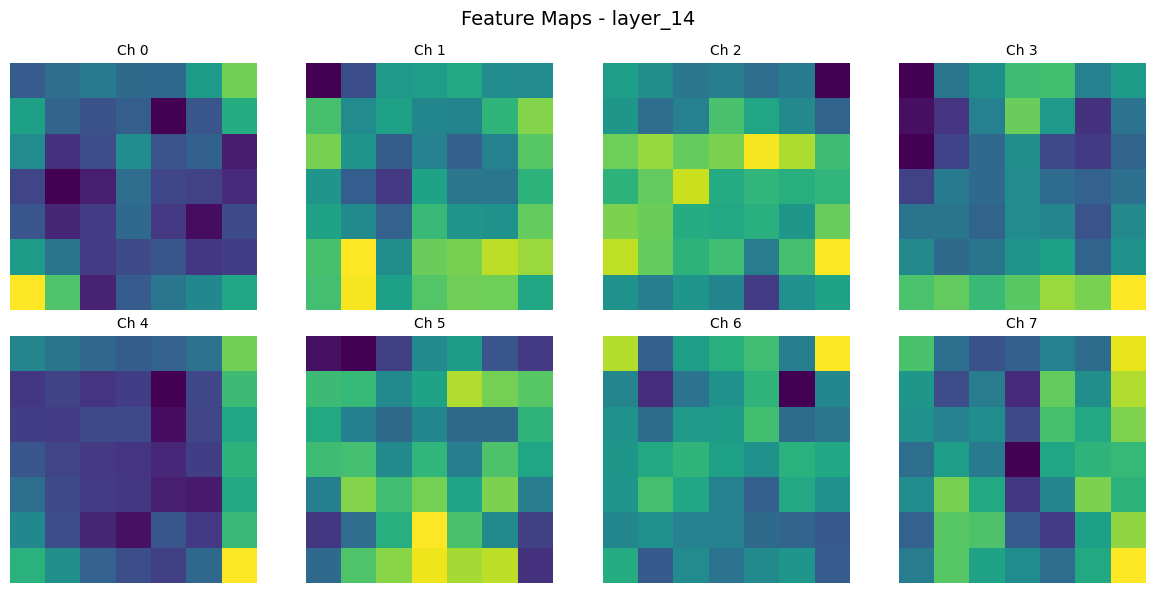

🔍 layer_15


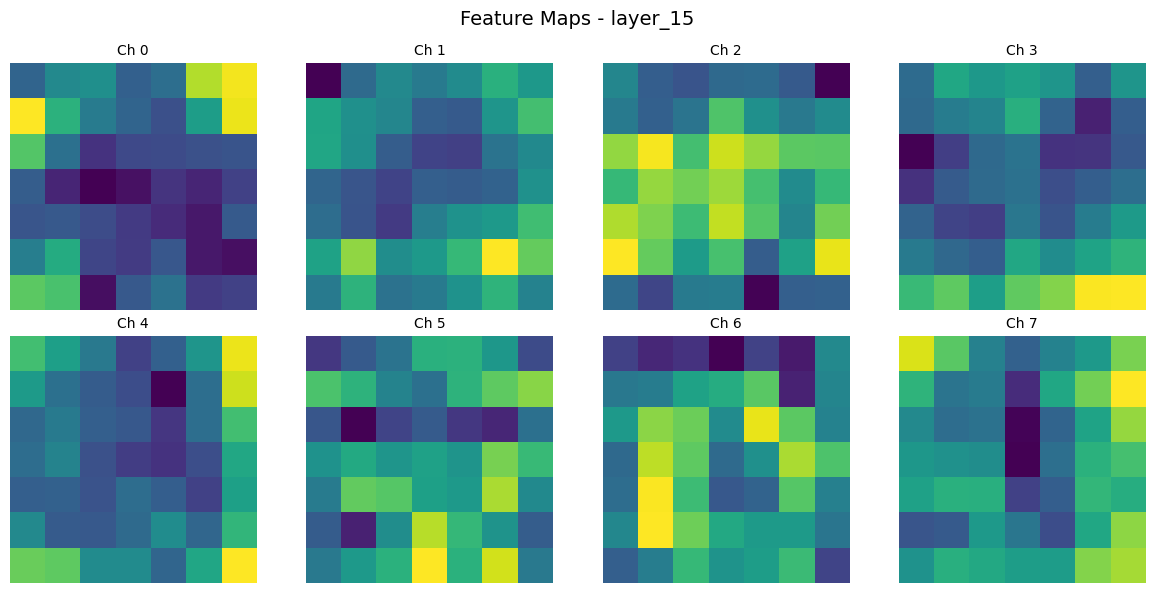

🔍 layer_16


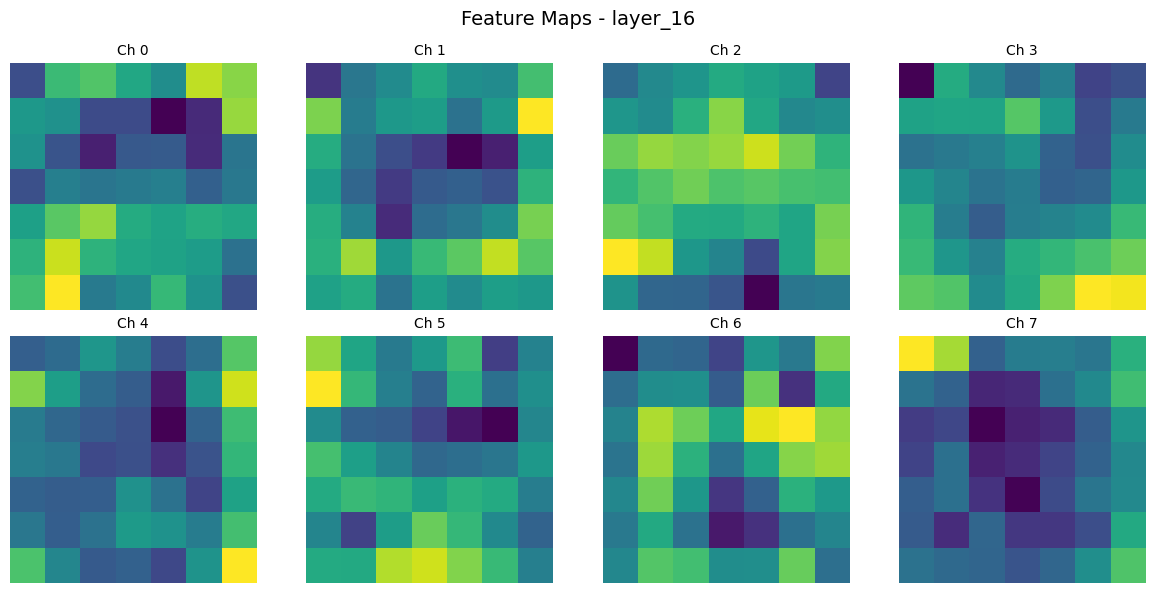

🔍 layer_17


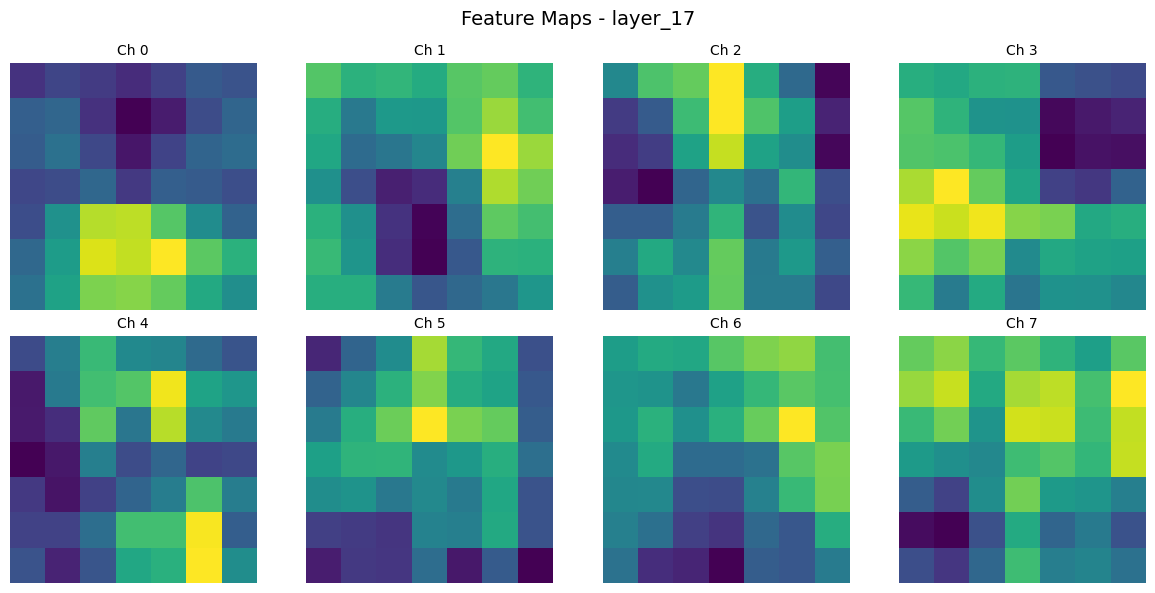

🔍 layer_18


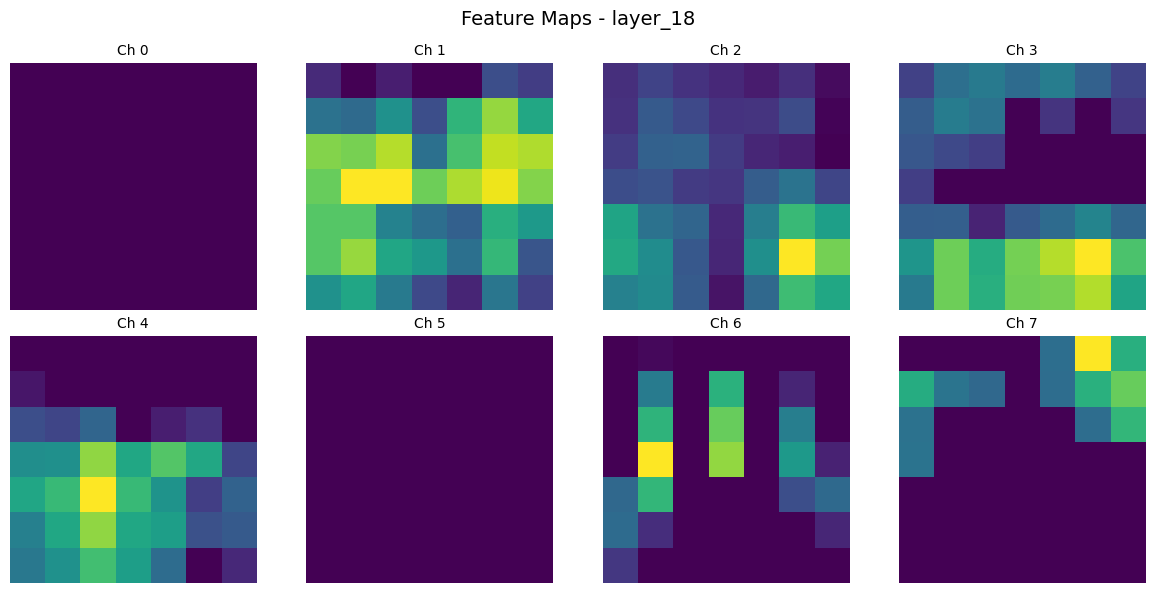

In [ ]:
# Imports
import torch
import torchvision.models as models
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# ===== 1. Load MobileNetV2 model =====
model = models.mobilenet_v2(pretrained=True)
model.eval()

# ===== 2. Load image =====
image = Image.open('/content/1.png').convert('RGB')

# ===== 3. Image transform =====
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
input_tensor = transform(image).unsqueeze(0)  # Shape: [1, 3, 224, 224]

# ===== 4. Register hooks for feature maps =====
feature_maps = {}

def get_hook(name):
    def hook(module, input, output):
        feature_maps[name] = output.detach()
    return hook

# Hook to all layers inside model.features
for name, layer in model.features.named_children():
    layer.register_forward_hook(get_hook(f'layer_{name}'))

# ===== 5. Run the model =====
with torch.no_grad():
    _ = model(input_tensor)

# ===== 6. Create output directory =====
output_dir = 'mobilenetv2_feature_maps'
os.makedirs(output_dir, exist_ok=True)

# ===== 7. Save feature maps function =====
def save_feature_maps(layer_name, num_channels=8):
    fmap = feature_maps[layer_name][0]
    num_channels = min(num_channels, fmap.shape[0])
    cols = 4
    rows = int(np.ceil(num_channels / cols))

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
    axes = axes.flatten()

    for i in range(num_channels):
        axes[i].imshow(fmap[i].cpu().numpy(), cmap='viridis')
        axes[i].axis('off')
        axes[i].set_title(f'Ch {i}', fontsize=10)

    for j in range(num_channels, len(axes)):
        axes[j].axis('off')

    plt.suptitle(f'Feature Maps - {layer_name}', fontsize=14)
    plt.tight_layout()
    plt.savefig(f"{output_dir}/{layer_name}.png")
    plt.show()

# ===== 8. Generate and save feature maps =====
print("✅ Extracted feature maps from layers:")
for layer_name in feature_maps.keys():
    print(f"🔍 {layer_name}")
    save_feature_maps(layer_name, num_channels=8)


In [ ]:
# Imports
import torch
import torchvision.models as models
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# ===== 1. Load densenet201 model =====
model = models.densenet201(pretrained=True)
model.eval()

# ===== 2. Load image =====
image = Image.open('/content/1.png').convert('RGB')

# ===== 3. Image transform =====
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
input_tensor = transform(image).unsqueeze(0)  # Shape: [1, 3, 224, 224]

# ===== 4. Register hooks for feature maps =====
feature_maps = {}

def get_hook(name):
    def hook(module, input, output):
        feature_maps[name] = output.detach()
    return hook

# Hook to all layers inside model.features
for name, layer in model.features.named_children():
    layer.register_forward_hook(get_hook(f'layer_{name}'))

# ===== 5. Run the model =====
with torch.no_grad():
    _ = model(input_tensor)

# ===== 6. Create output directory =====
output_dir = 'mobilenetv2_feature_maps'
os.makedirs(output_dir, exist_ok=True)

# ===== 7. Save feature maps function =====
def save_feature_maps(layer_name, num_channels=8):
    fmap = feature_maps[layer_name][0]
    num_channels = min(num_channels, fmap.shape[0])
    cols = 4
    rows = int(np.ceil(num_channels / cols))

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
    axes = axes.flatten()

    for i in range(num_channels):
        axes[i].imshow(fmap[i].cpu().numpy(), cmap='viridis')
        axes[i].axis('off')
        axes[i].set_title(f'Ch {i}', fontsize=10)

    for j in range(num_channels, len(axes)):
        axes[j].axis('off')

    plt.suptitle(f'Feature Maps - {layer_name}', fontsize=14)
    plt.tight_layout()
    plt.savefig(f"{output_dir}/{layer_name}.png")
    plt.show()

# ===== 8. Generate and save feature maps =====
print("✅ Extracted feature maps from layers:")
for layer_name in feature_maps.keys():
    print(f"🔍 {layer_name}")
    save_feature_maps(layer_name, num_channels=8)


In [ ]:
# Imports
import torch
import torchvision.models as models
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# ===== 1. Load densenet169 model =====
model = models.densenet169(pretrained=True)
model.eval()

# ===== 2. Load image =====
image = Image.open('/content/1.png').convert('RGB')

# ===== 3. Image transform =====
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
input_tensor = transform(image).unsqueeze(0)  # Shape: [1, 3, 224, 224]

# ===== 4. Register hooks for feature maps =====
feature_maps = {}

def get_hook(name):
    def hook(module, input, output):
        feature_maps[name] = output.detach()
    return hook

# Hook to all layers inside model.features
for name, layer in model.features.named_children():
    layer.register_forward_hook(get_hook(f'layer_{name}'))

# ===== 5. Run the model =====
with torch.no_grad():
    _ = model(input_tensor)

# ===== 6. Create output directory =====
output_dir = 'mobilenetv2_feature_maps'
os.makedirs(output_dir, exist_ok=True)

# ===== 7. Save feature maps function =====
def save_feature_maps(layer_name, num_channels=8):
    fmap = feature_maps[layer_name][0]
    num_channels = min(num_channels, fmap.shape[0])
    cols = 4
    rows = int(np.ceil(num_channels / cols))

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
    axes = axes.flatten()

    for i in range(num_channels):
        axes[i].imshow(fmap[i].cpu().numpy(), cmap='viridis')
        axes[i].axis('off')
        axes[i].set_title(f'Ch {i}', fontsize=10)

    for j in range(num_channels, len(axes)):
        axes[j].axis('off')

    plt.suptitle(f'Feature Maps - {layer_name}', fontsize=14)
    plt.tight_layout()
    plt.savefig(f"{output_dir}/{layer_name}.png")
    plt.show()

# ===== 8. Generate and save feature maps =====
print("✅ Extracted feature maps from layers:")
for layer_name in feature_maps.keys():
    print(f"🔍 {layer_name}")
    save_feature_maps(layer_name, num_channels=8)


✅ Extracted feature maps from layers:
🔍 layer_0


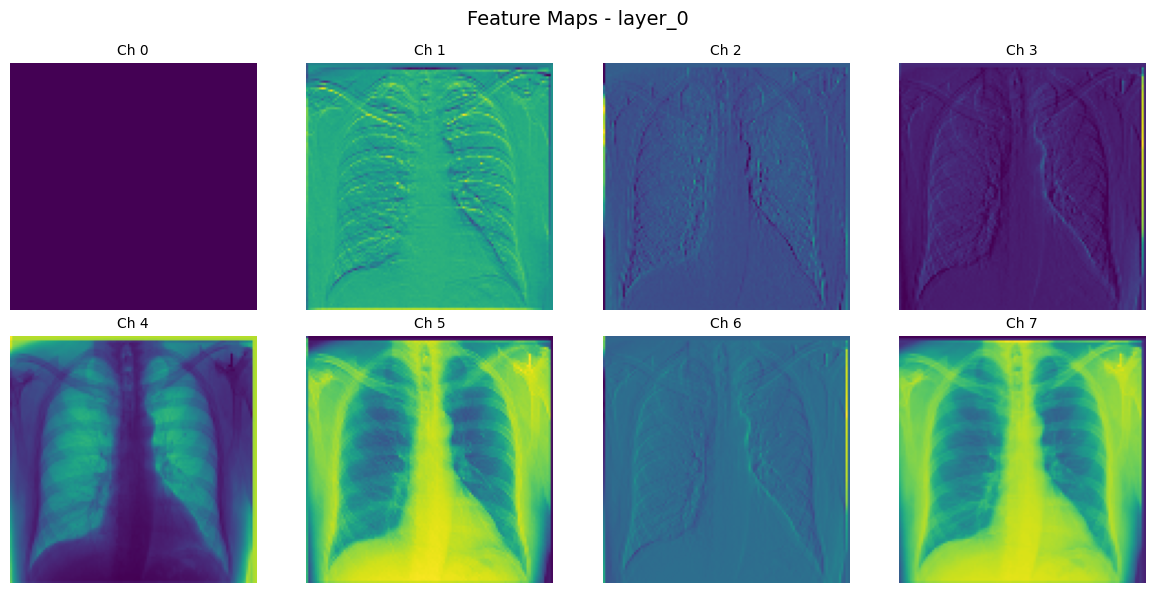

🔍 layer_1


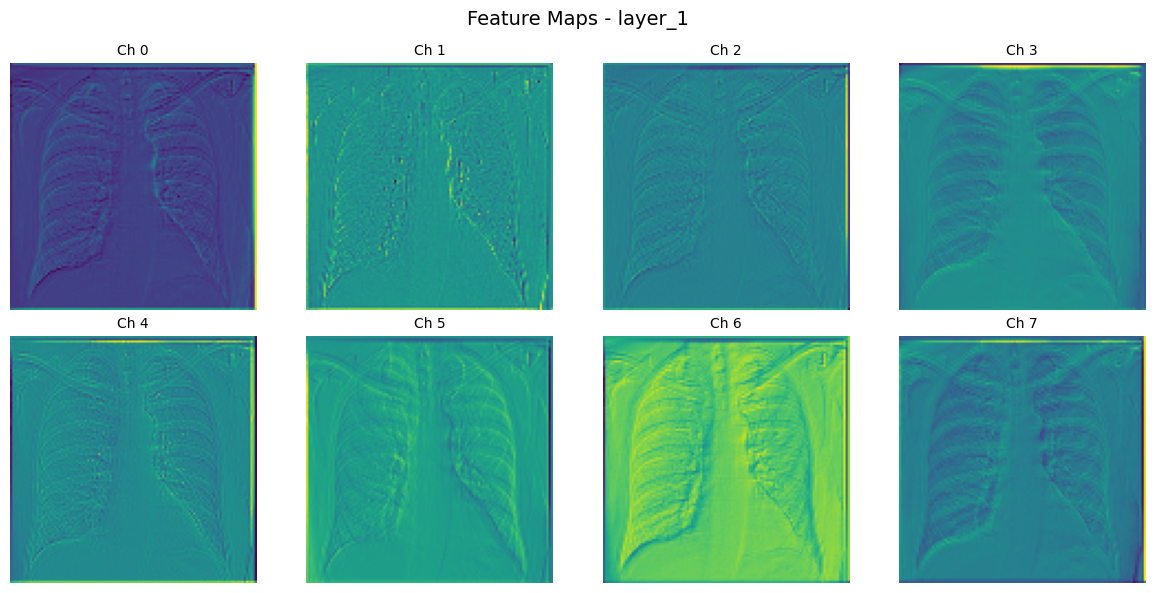

🔍 layer_2


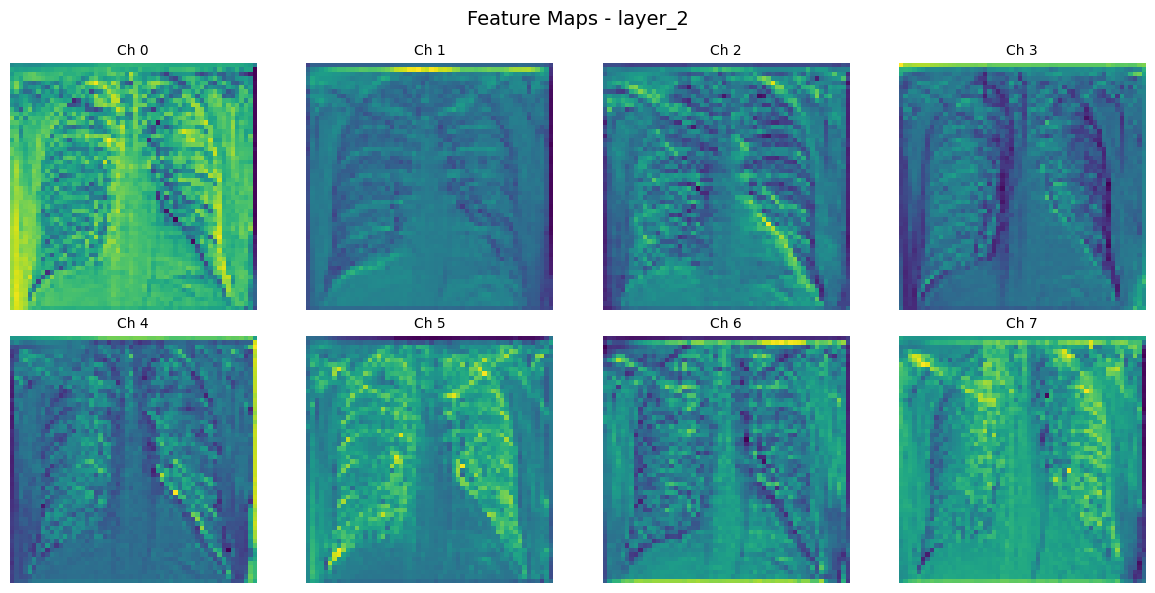

🔍 layer_3


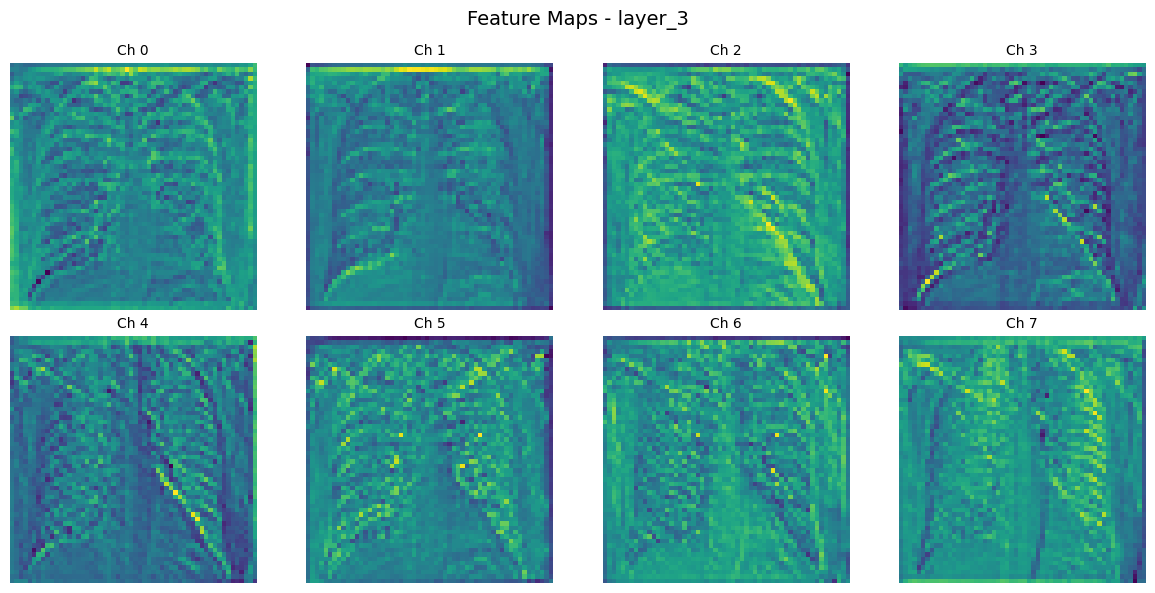

🔍 layer_4


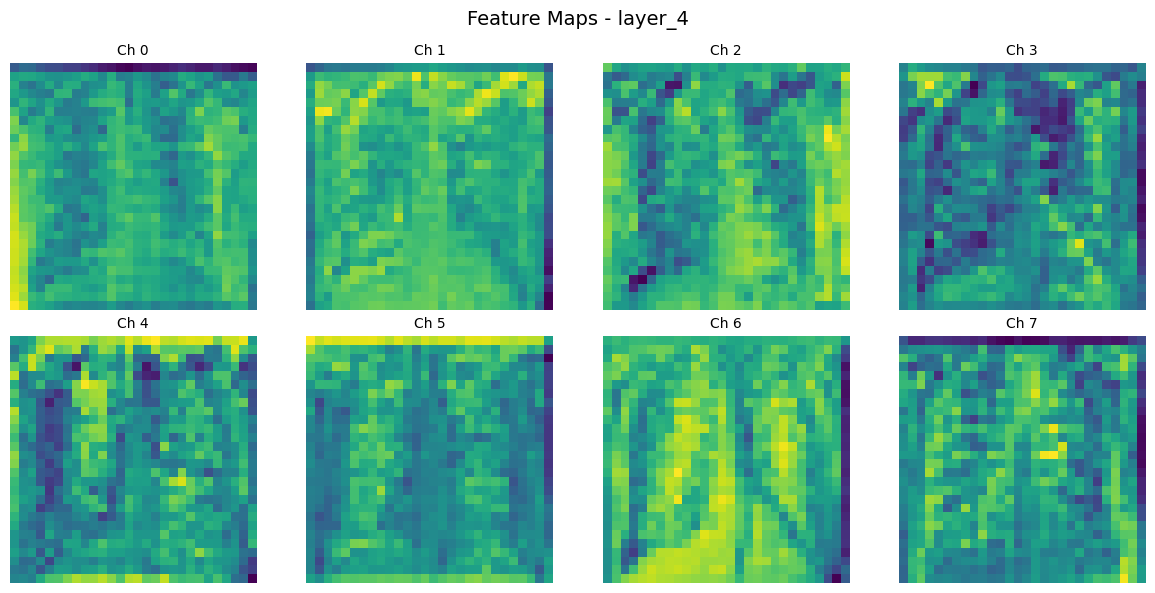

🔍 layer_5


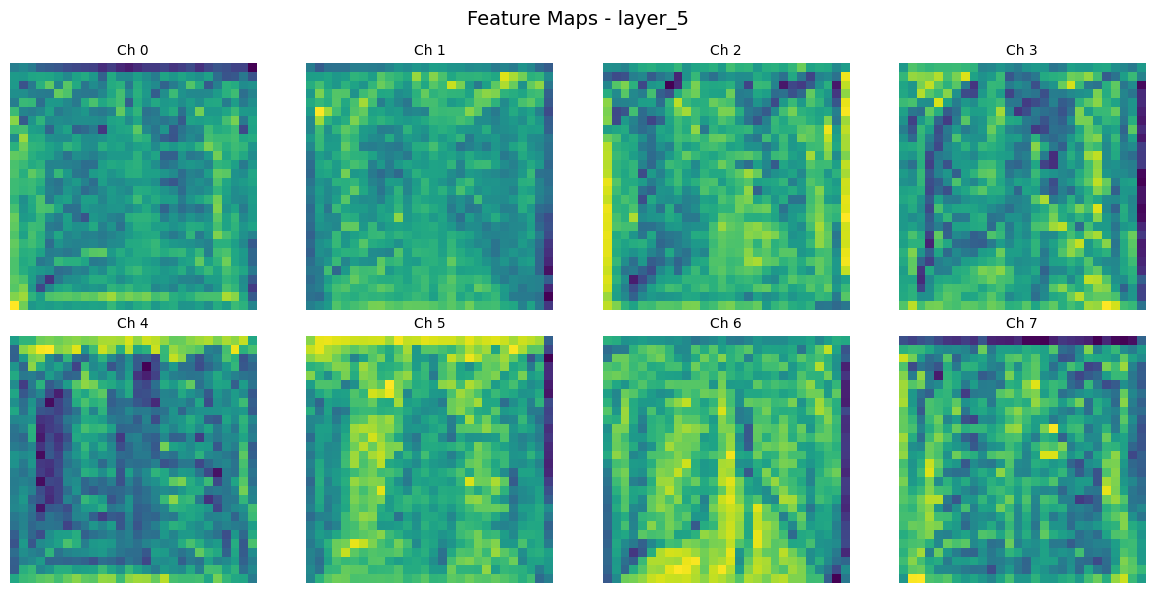

🔍 layer_6


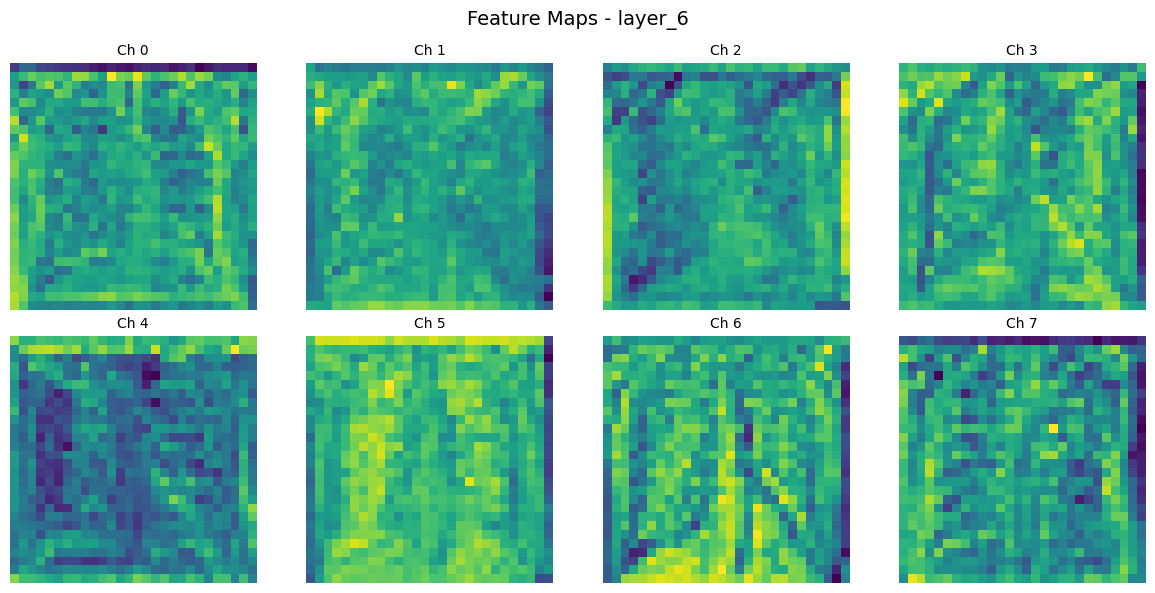

🔍 layer_7


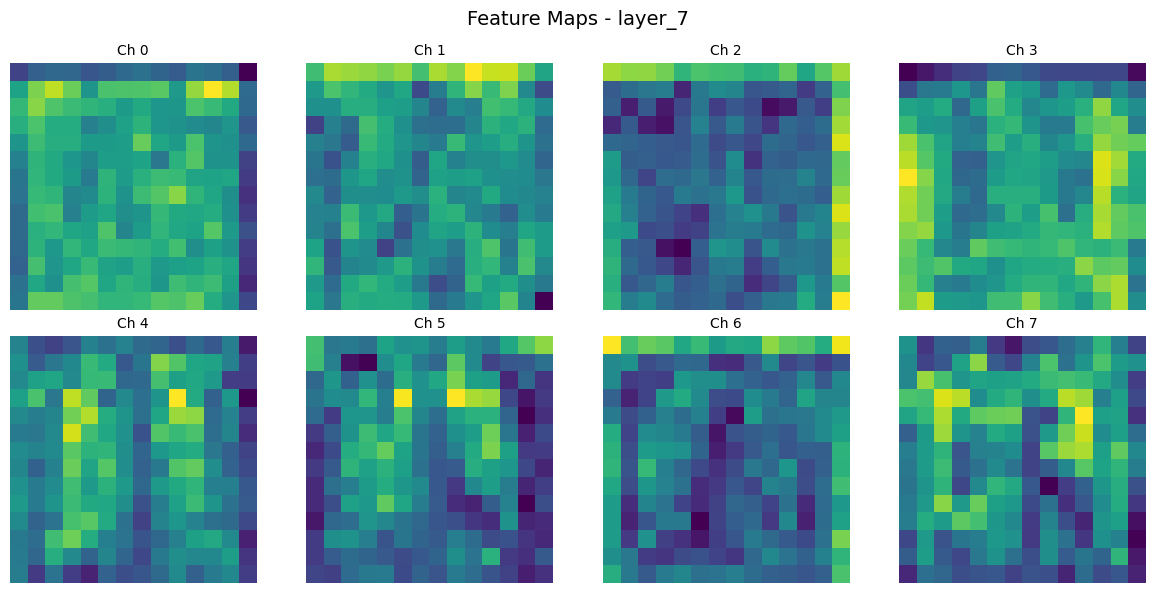

🔍 layer_8


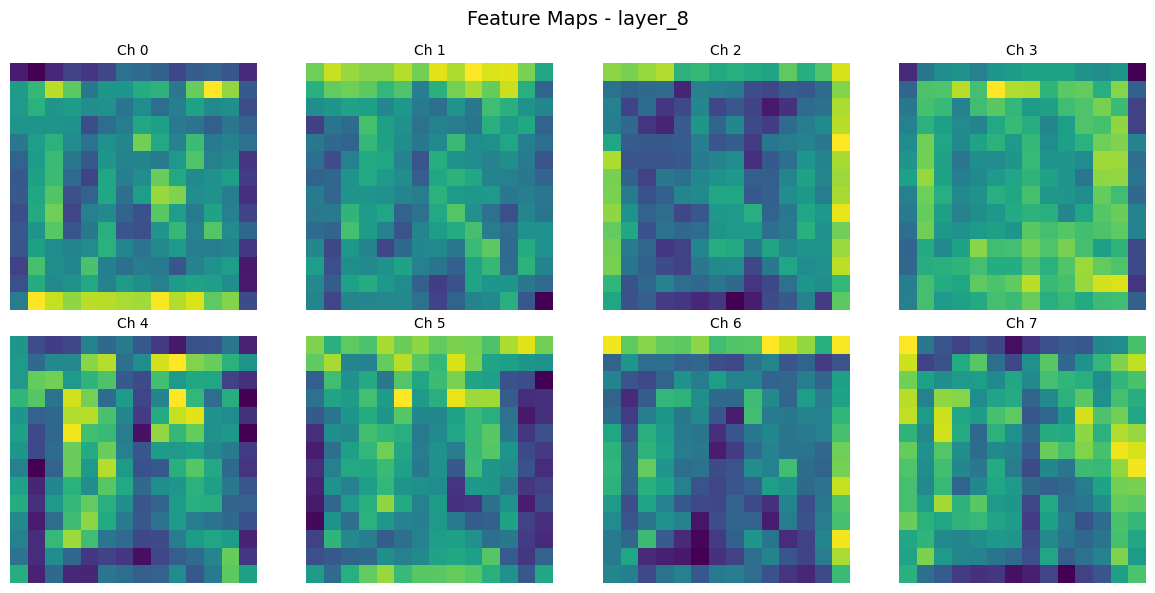

🔍 layer_9


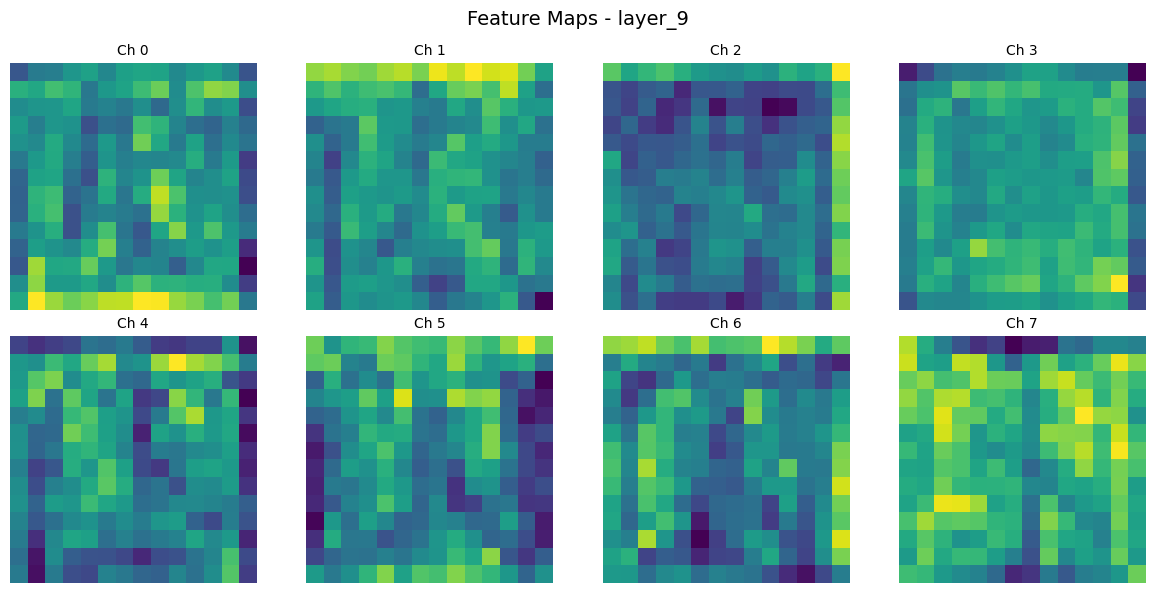

🔍 layer_10


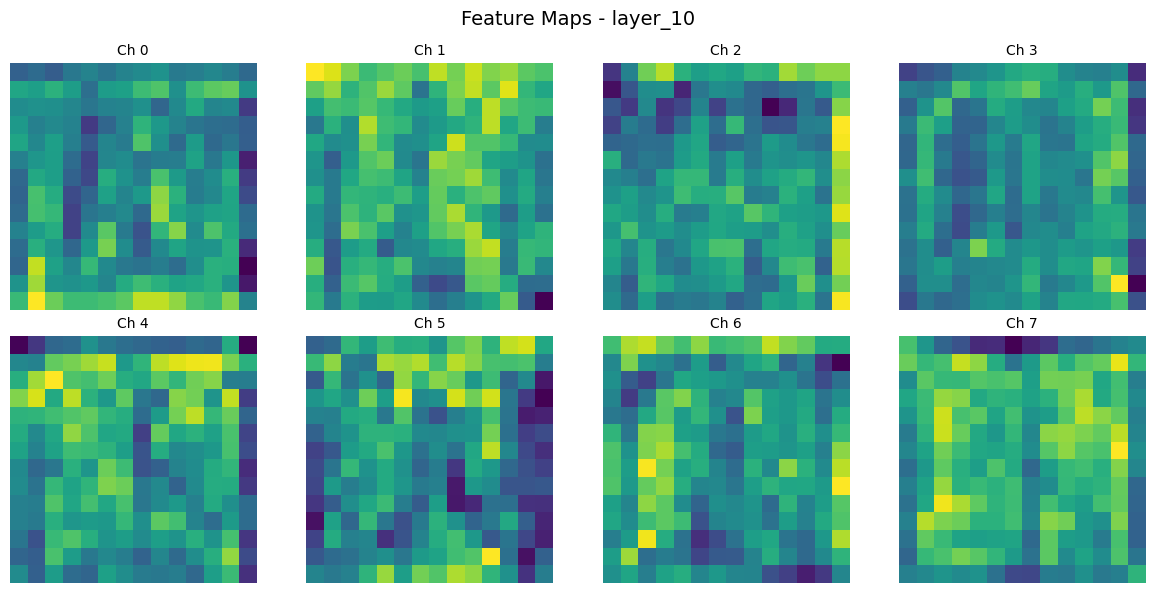

🔍 layer_11


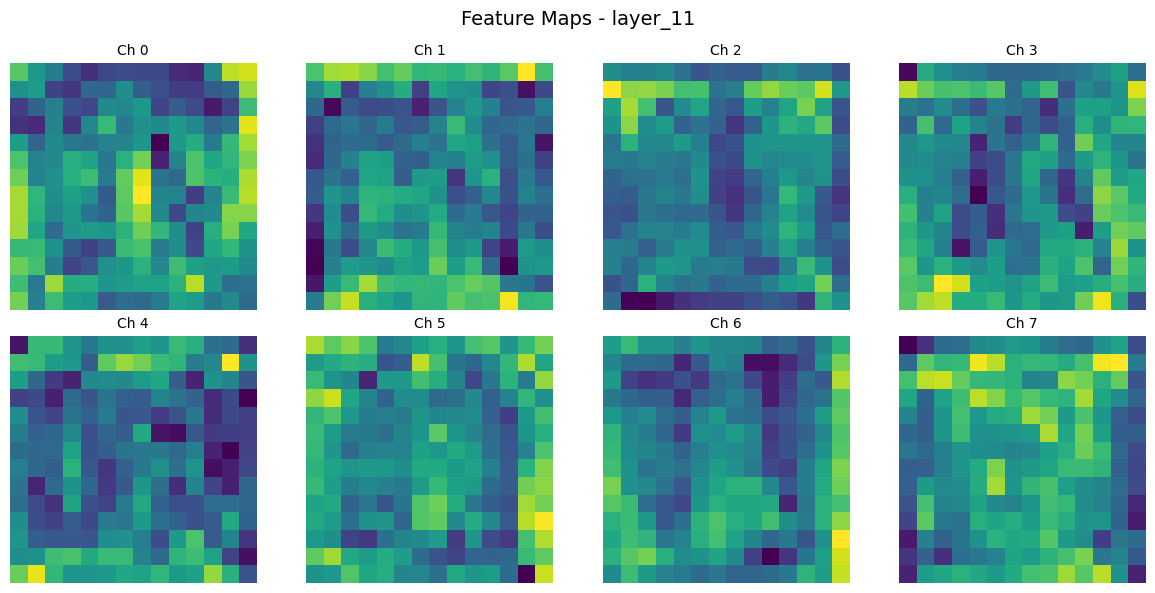

🔍 layer_12


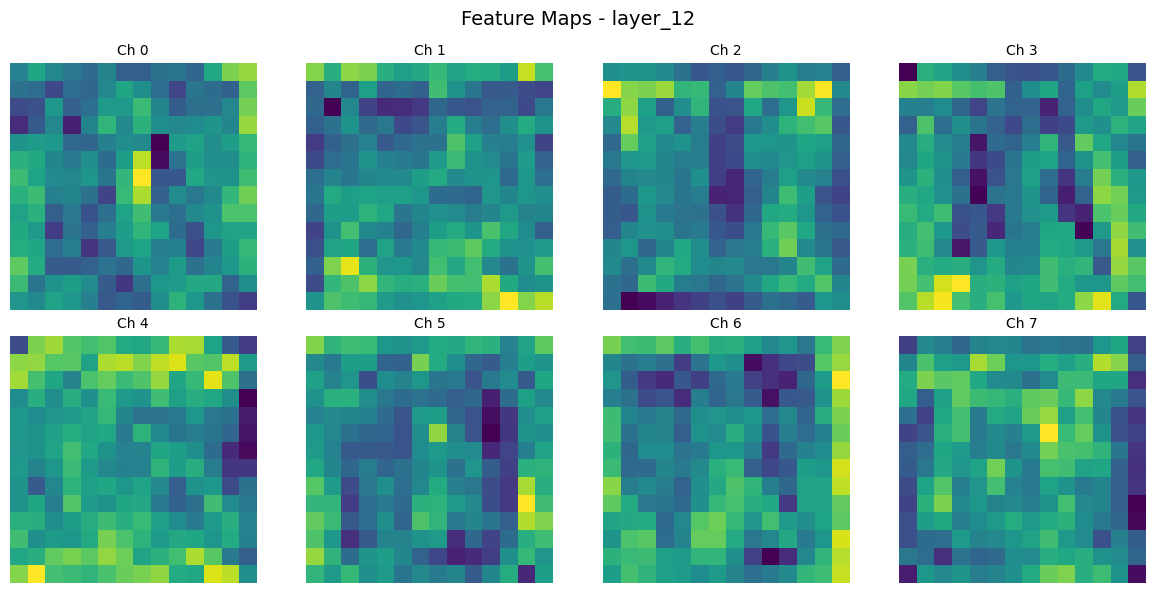

🔍 layer_13


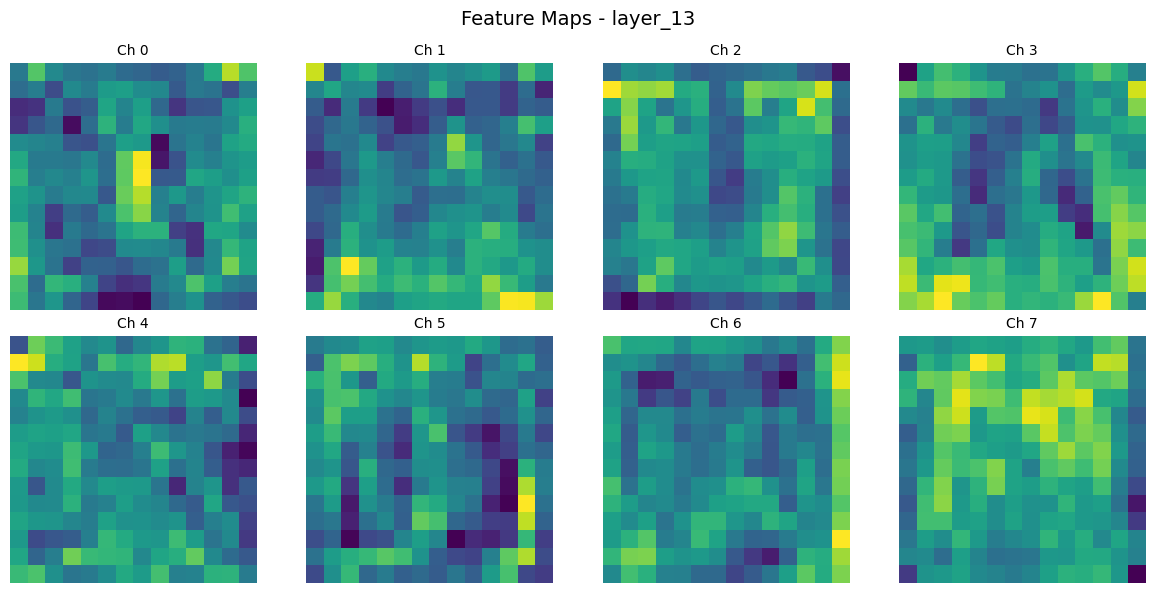

🔍 layer_14


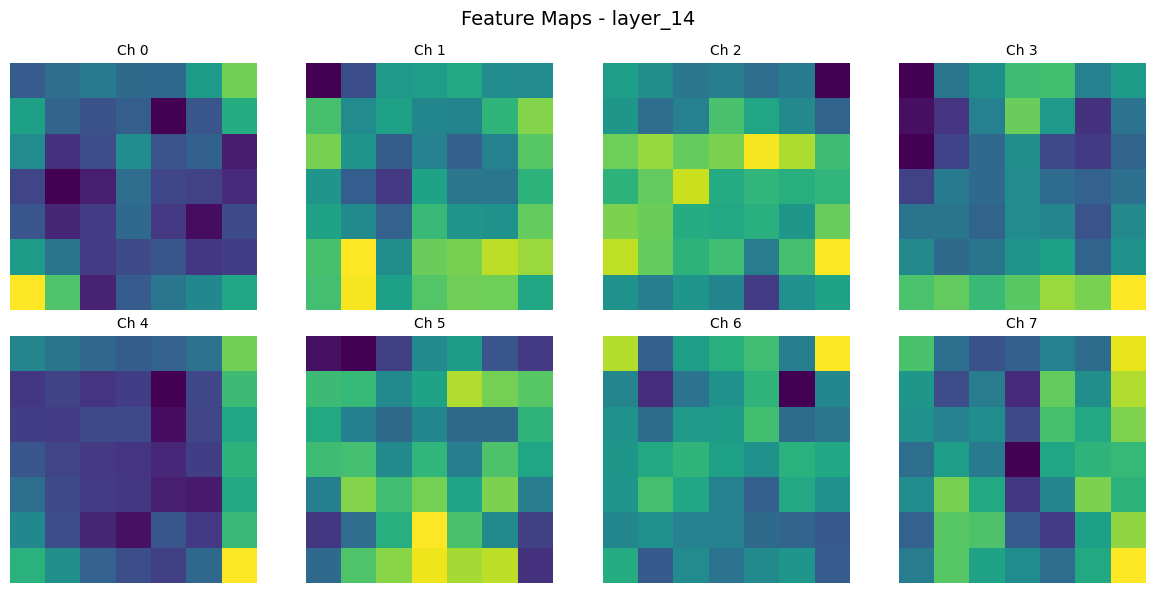

🔍 layer_15


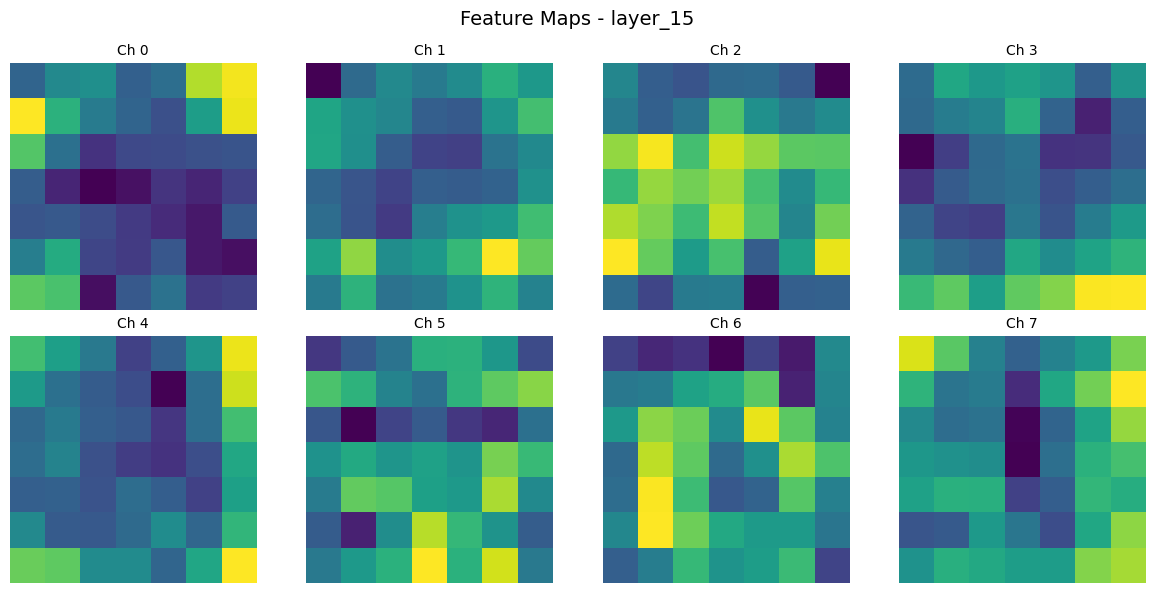

🔍 layer_16


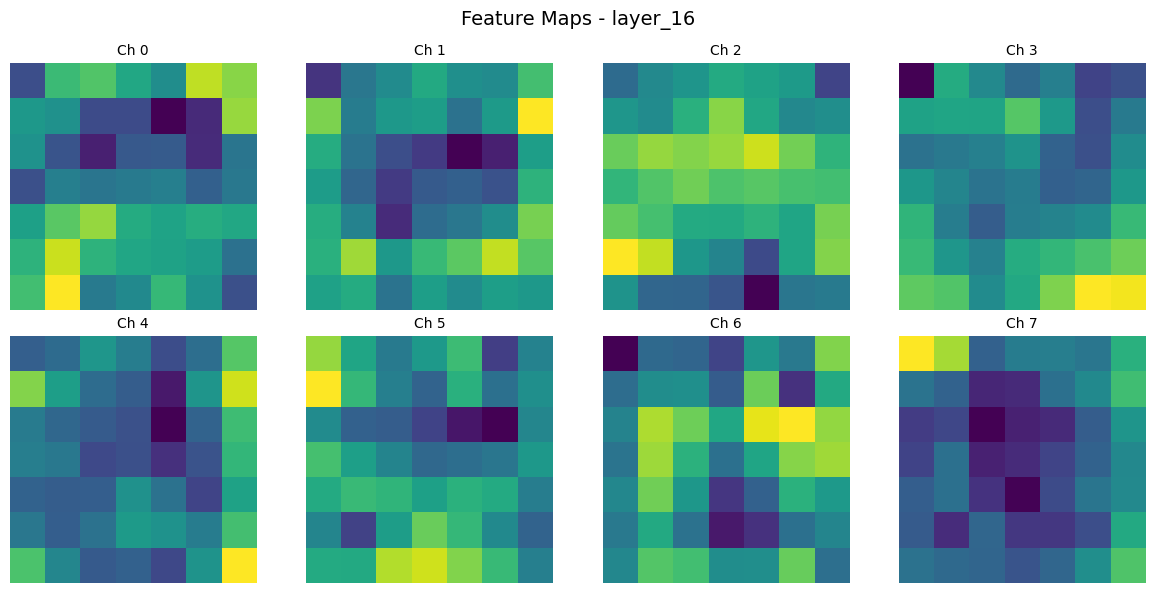

🔍 layer_17


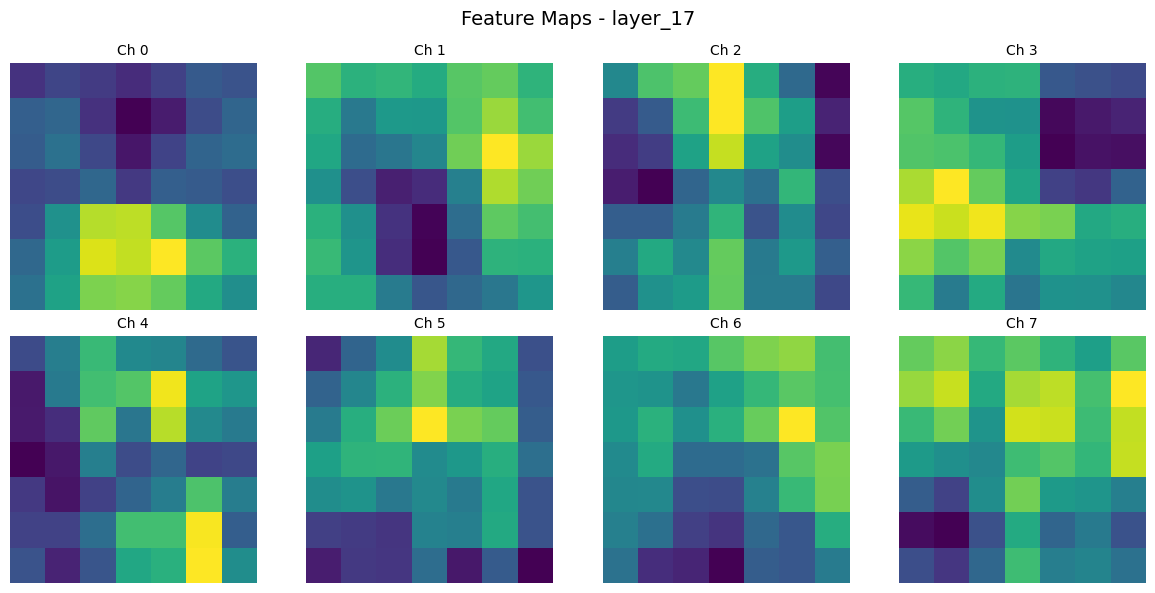

🔍 layer_18


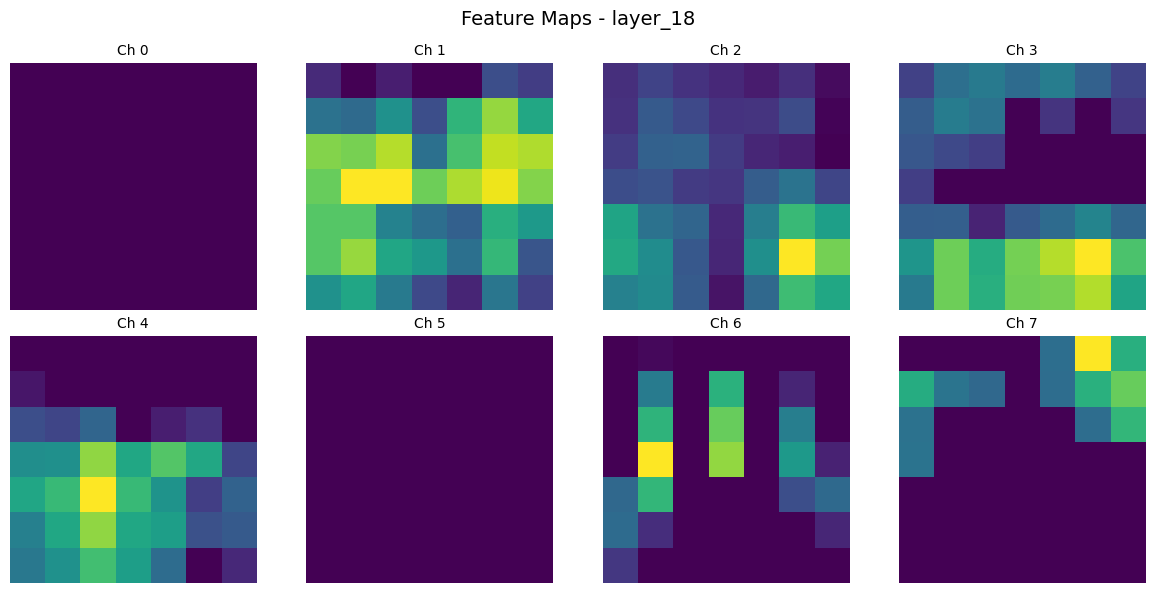

In [ ]:
# Imports
import torch
import torchvision.models as models
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# ===== 1. Load mobilenet_v2 model =====
model = models.mobilenet_v2(pretrained=True)
model.eval()

# ===== 2. Load image =====
image = Image.open('/content/1.png').convert('RGB')

# ===== 3. Image transform =====
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
input_tensor = transform(image).unsqueeze(0)  # Shape: [1, 3, 224, 224]

# ===== 4. Register hooks for feature maps =====
feature_maps = {}

def get_hook(name):
    def hook(module, input, output):
        feature_maps[name] = output.detach()
    return hook

# Hook to all layers inside model.features
for name, layer in model.features.named_children():
    layer.register_forward_hook(get_hook(f'layer_{name}'))

# ===== 5. Run the model =====
with torch.no_grad():
    _ = model(input_tensor)

# ===== 6. Create output directory =====
output_dir = 'mobilenetv2_feature_maps'
os.makedirs(output_dir, exist_ok=True)

# ===== 7. Save feature maps function =====
def save_feature_maps(layer_name, num_channels=8):
    fmap = feature_maps[layer_name][0]
    num_channels = min(num_channels, fmap.shape[0])
    cols = 4
    rows = int(np.ceil(num_channels / cols))

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
    axes = axes.flatten()

    for i in range(num_channels):
        axes[i].imshow(fmap[i].cpu().numpy(), cmap='viridis')
        axes[i].axis('off')
        axes[i].set_title(f'Ch {i}', fontsize=10)

    for j in range(num_channels, len(axes)):
        axes[j].axis('off')

    plt.suptitle(f'Feature Maps - {layer_name}', fontsize=14)
    plt.tight_layout()
    plt.savefig(f"{output_dir}/{layer_name}.png")
    plt.show()

# ===== 8. Generate and save feature maps =====
print("✅ Extracted feature maps from layers:")
for layer_name in feature_maps.keys():
    print(f"🔍 {layer_name}")
    save_feature_maps(layer_name, num_channels=8)


In [ ]:
# Imports
import torch
import torchvision.models as models
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# ===== 1. Load resnet50 model =====
model = models.resnet50(pretrained=True)
model.eval()

# ===== 2. Load image =====
image = Image.open('/content/1.png').convert('RGB')

# ===== 3. Image transform =====
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
input_tensor = transform(image).unsqueeze(0)  # Shape: [1, 3, 224, 224]

# ===== 4. Register hooks for feature maps =====
layers_to_hook = ['conv1', 'bn1', 'relu', 'maxpool', 'layer1', 'layer2', 'layer3', 'layer4']

for name in layers_to_hook:
    layer = getattr(model, name)
    layer.register_forward_hook(get_hook(name))



# ===== 5. Run the model =====
with torch.no_grad():
    _ = model(input_tensor)

# ===== 6. Create output directory =====
output_dir = 'mobilenetv2_feature_maps'
os.makedirs(output_dir, exist_ok=True)

# ===== 7. Save feature maps function =====
def save_feature_maps(layer_name, num_channels=8):
    fmap = feature_maps[layer_name][0]
    num_channels = min(num_channels, fmap.shape[0])
    cols = 4
    rows = int(np.ceil(num_channels / cols))

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
    axes = axes.flatten()

    for i in range(num_channels):
        axes[i].imshow(fmap[i].cpu().numpy(), cmap='viridis')
        axes[i].axis('off')
        axes[i].set_title(f'Ch {i}', fontsize=10)

    for j in range(num_channels, len(axes)):
        axes[j].axis('off')

    plt.suptitle(f'Feature Maps - {layer_name}', fontsize=14)
    plt.tight_layout()
    plt.savefig(f"{output_dir}/{layer_name}.png")
    plt.show()

# ===== 8. Generate and save feature maps =====
print("✅ Extracted feature maps from layers:")
for layer_name in feature_maps.keys():
    print(f"🔍 {layer_name}")
    save_feature_maps(layer_name, num_channels=8)


In [ ]:
# Imports
import torch
import torchvision.models as models
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# ===== 1. Load resnet152 model =====
model = models.resnet152(pretrained=True)
model.eval()

# ===== 2. Load image =====
image = Image.open('/content/1.png').convert('RGB')

# ===== 3. Image transform =====
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
input_tensor = transform(image).unsqueeze(0)  # Shape: [1, 3, 224, 224]

# ===== 4. Register hooks for feature maps =====
layers_to_hook = ['conv1', 'bn1', 'relu', 'maxpool', 'layer1', 'layer2', 'layer3', 'layer4']

for name in layers_to_hook:
    layer = getattr(model, name)
    layer.register_forward_hook(get_hook(name))



# ===== 5. Run the model =====
with torch.no_grad():
    _ = model(input_tensor)

# ===== 6. Create output directory =====
output_dir = 'mobilenetv2_feature_maps'
os.makedirs(output_dir, exist_ok=True)

# ===== 7. Save feature maps function =====
def save_feature_maps(layer_name, num_channels=8):
    fmap = feature_maps[layer_name][0]
    num_channels = min(num_channels, fmap.shape[0])
    cols = 4
    rows = int(np.ceil(num_channels / cols))

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
    axes = axes.flatten()

    for i in range(num_channels):
        axes[i].imshow(fmap[i].cpu().numpy(), cmap='viridis')
        axes[i].axis('off')
        axes[i].set_title(f'Ch {i}', fontsize=10)

    for j in range(num_channels, len(axes)):
        axes[j].axis('off')

    plt.suptitle(f'Feature Maps - {layer_name}', fontsize=14)
    plt.tight_layout()
    plt.savefig(f"{output_dir}/{layer_name}.png")
    plt.show()

# ===== 8. Generate and save feature maps =====
print("✅ Extracted feature maps from layers:")
for layer_name in feature_maps.keys():
    print(f"🔍 {layer_name}")
    save_feature_maps(layer_name, num_channels=8)


In [ ]:
# Imports
import torch
import torchvision.models as models
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# ===== 1. Load densenet201 model =====
model = models.densenet201(pretrained=True)
model.eval()

# ===== 2. Load image =====
image = Image.open('/content/1.png').convert('RGB')

# ===== 3. Image transform =====
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
input_tensor = transform(image).unsqueeze(0)  # Shape: [1, 3, 224, 224]

# ===== 4. Register hooks for feature maps =====
feature_maps = {}

def get_hook(name):
    def hook(module, input, output):
        feature_maps[name] = output.detach()
    return hook

# Hook to all layers inside model.features
for name, layer in model.features.named_children():
    layer.register_forward_hook(get_hook(f'layer_{name}'))

# ===== 5. Run the model =====
with torch.no_grad():
    _ = model(input_tensor)

# ===== 6. Create output directory =====
output_dir = 'mobilenetv2_feature_maps'
os.makedirs(output_dir, exist_ok=True)

# ===== 7. Save feature maps function =====
def save_feature_maps(layer_name, num_channels=8):
    fmap = feature_maps[layer_name][0]
    num_channels = min(num_channels, fmap.shape[0])
    cols = 4
    rows = int(np.ceil(num_channels / cols))

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
    axes = axes.flatten()

    for i in range(num_channels):
        axes[i].imshow(fmap[i].cpu().numpy(), cmap='viridis')
        axes[i].axis('off')
        axes[i].set_title(f'Ch {i}', fontsize=10)

    for j in range(num_channels, len(axes)):
        axes[j].axis('off')

    plt.suptitle(f'Feature Maps - {layer_name}', fontsize=14)
    plt.tight_layout()
    plt.savefig(f"{output_dir}/{layer_name}.png")
    plt.show()

# ===== 8. Generate and save feature maps =====
print("✅ Extracted feature maps from layers:")
for layer_name in feature_maps.keys():
    print(f"🔍 {layer_name}")
    save_feature_maps(layer_name, num_channels=8)


In [ ]:
# Imports
import torch
import torchvision.models as models
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# ===== 1. Load densenet169 model =====
model = models.densenet169(pretrained=True)
model.eval()

# ===== 2. Load image =====
image = Image.open('/content/1.png').convert('RGB')

# ===== 3. Image transform =====
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
input_tensor = transform(image).unsqueeze(0)  # Shape: [1, 3, 224, 224]

# ===== 4. Register hooks for feature maps =====
feature_maps = {}

def get_hook(name):
    def hook(module, input, output):
        feature_maps[name] = output.detach()
    return hook

# Hook to all layers inside model.features
for name, layer in model.features.named_children():
    layer.register_forward_hook(get_hook(f'layer_{name}'))

# ===== 5. Run the model =====
with torch.no_grad():
    _ = model(input_tensor)

# ===== 6. Create output directory =====
output_dir = 'mobilenetv2_feature_maps'
os.makedirs(output_dir, exist_ok=True)

# ===== 7. Save feature maps function =====
def save_feature_maps(layer_name, num_channels=8):
    fmap = feature_maps[layer_name][0]
    num_channels = min(num_channels, fmap.shape[0])
    cols = 4
    rows = int(np.ceil(num_channels / cols))

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
    axes = axes.flatten()

    for i in range(num_channels):
        axes[i].imshow(fmap[i].cpu().numpy(), cmap='viridis')
        axes[i].axis('off')
        axes[i].set_title(f'Ch {i}', fontsize=10)

    for j in range(num_channels, len(axes)):
        axes[j].axis('off')

    plt.suptitle(f'Feature Maps - {layer_name}', fontsize=14)
    plt.tight_layout()
    plt.savefig(f"{output_dir}/{layer_name}.png")
    plt.show()

# ===== 8. Generate and save feature maps =====
print("✅ Extracted feature maps from layers:")
for layer_name in feature_maps.keys():
    print(f"🔍 {layer_name}")
    save_feature_maps(layer_name, num_channels=8)


In [ ]:
# Imports
import torch
import torchvision.models as models
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# ===== 1. Load mobilenet_v2 model =====
model = models.mobilenet_v2(pretrained=True)
model.eval()

# ===== 2. Load image =====
image = Image.open('/content/1.png').convert('RGB')

# ===== 3. Image transform =====
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
input_tensor = transform(image).unsqueeze(0)  # Shape: [1, 3, 224, 224]

# ===== 4. Register hooks for feature maps =====
feature_maps = {}

def get_hook(name):
    def hook(module, input, output):
        feature_maps[name] = output.detach()
    return hook

# Hook to all layers inside model.features
for name, layer in model.features.named_children():
    layer.register_forward_hook(get_hook(f'layer_{name}'))

# ===== 5. Run the model =====
with torch.no_grad():
    _ = model(input_tensor)

# ===== 6. Create output directory =====
output_dir = 'mobilenetv2_feature_maps'
os.makedirs(output_dir, exist_ok=True)

# ===== 7. Save feature maps function =====
def save_feature_maps(layer_name, num_channels=8):
    fmap = feature_maps[layer_name][0]
    num_channels = min(num_channels, fmap.shape[0])
    cols = 4
    rows = int(np.ceil(num_channels / cols))

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
    axes = axes.flatten()

    for i in range(num_channels):
        axes[i].imshow(fmap[i].cpu().numpy(), cmap='viridis')
        axes[i].axis('off')
        axes[i].set_title(f'Ch {i}', fontsize=10)

    for j in range(num_channels, len(axes)):
        axes[j].axis('off')

    plt.suptitle(f'Feature Maps - {layer_name}', fontsize=14)
    plt.tight_layout()
    plt.savefig(f"{output_dir}/{layer_name}.png")
    plt.show()

# ===== 8. Generate and save feature maps =====
print("✅ Extracted feature maps from layers:")
for layer_name in feature_maps.keys():
    print(f"🔍 {layer_name}")
    save_feature_maps(layer_name, num_channels=8)
